In [2]:
# df = pd.read_csv('/Users/padmanabhjagdishwanikar/Downloads/22070521058_PadmanabhWanikar_SecA_CA1_DSEDA/cleaned_dataset.csv')

Dataset loaded successfully!

Created crime category totals.

--- Analyzing: Murder vs. Violent Crimes Total ---
Model Coefficient (slope): 0.1043
Model Intercept: 0.5214
R-squared score: 0.3307


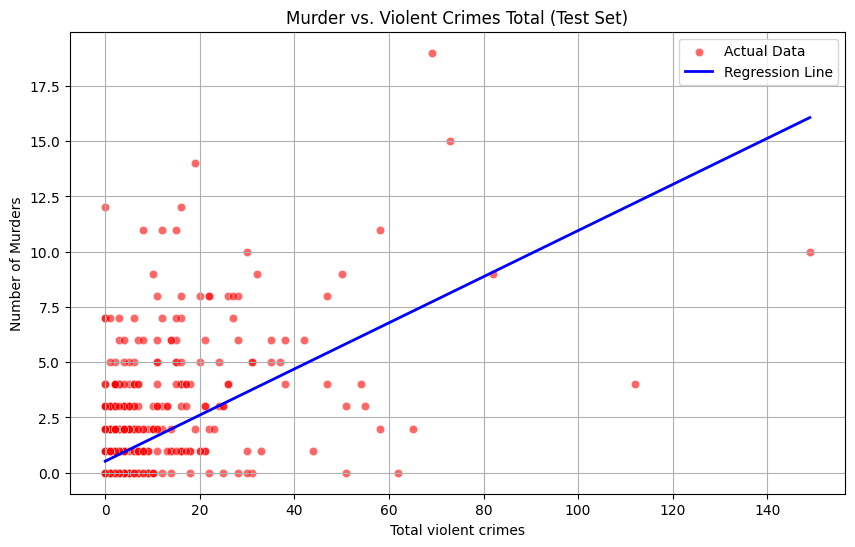


--- Analyzing: Murder vs. Property Crimes Total ---
Model Coefficient (slope): 0.2128
Model Intercept: 0.6369
R-squared score: 0.3089


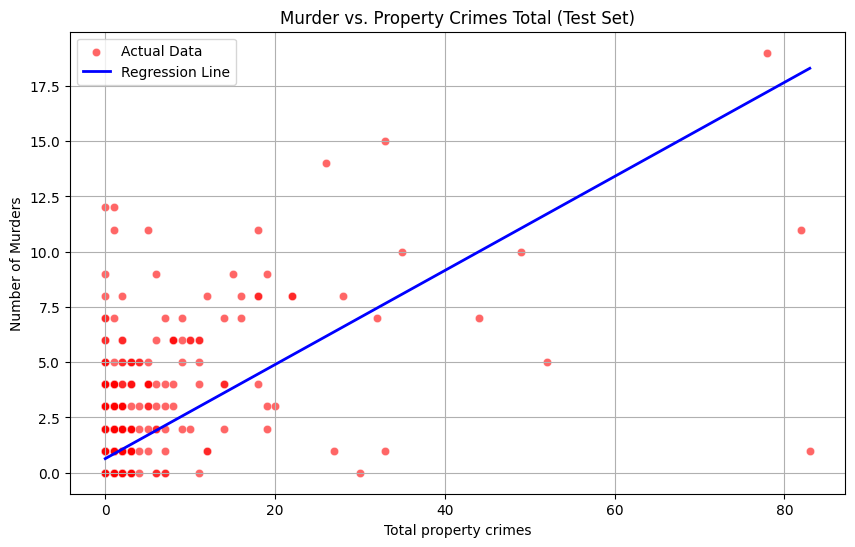


--- Analyzing: Murder vs. Crimes Against Women Total ---
Model Coefficient (slope): 0.1237
Model Intercept: 0.6193
R-squared score: 0.1962


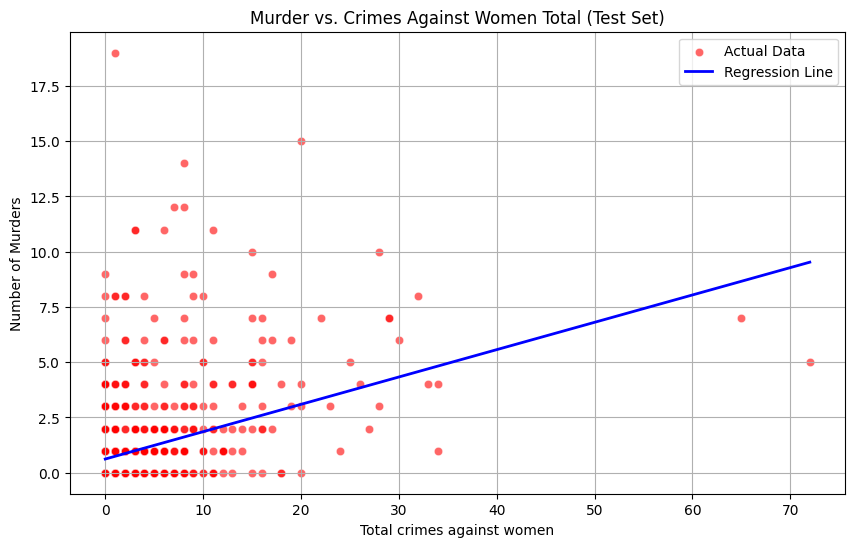


--- Analyzing: Murder vs. Negligence Deaths Total ---
Model Coefficient (slope): 0.3067
Model Intercept: 0.8008
R-squared score: -0.0136


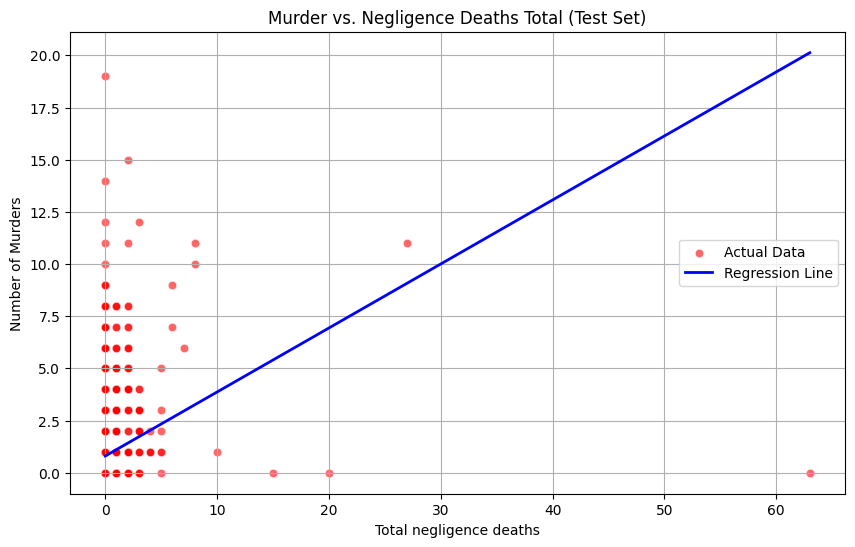

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Load your dataset ---
try:
    df = pd.read_csv('/Users/padmanabhjagdishwanikar/Downloads/22070521058_PadmanabhWanikar_SecA_CA1_DSEDA/cleaned_dataset.csv')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: 'cleaned_dataset.csv' not found. Please check the file path.")
    exit()

# --- Step 2: Define and Create Crime Categories (Corrected) ---
violent_crimes = [
    'clpbl_hmcd_not_amntng_mrd', 'attempt_to_commit_muder', 'atmpt_cmmt_culpbl_hmcd',
    'volntri_cusng_grvus_hrt', 'grvus_hrt_dang_wepon_or_mean', 'acid_attack', 'atmpt_acid_attack'
]

property_crimes = [
    'robbery', 
    'dacoity'
]

crimes_against_women = [
    'rape',
    'dowry_death', 'assault_on_women', 'sexual_harassment_at_work',
    'intent_disrobe', 'voyeurism', 'stalking'
]

negligence_deaths = [
    'hit_and_run', 'other_accidents', 'death_due_neglnc_rel_rail_acdnt',
    'death_due_to_med_neglnc', 'death_due_neglnc_civic_body', 'death_due_other_negligence'
]

# Create new columns in the dataframe by summing the crimes in each category
df['violent_crimes_total'] = df[violent_crimes].sum(axis=1)
df['property_crimes_total'] = df[property_crimes].sum(axis=1)
df['crimes_against_women_total'] = df[crimes_against_women].sum(axis=1)
df['negligence_deaths_total'] = df[negligence_deaths].sum(axis=1)

crime_categories = [
    'violent_crimes_total', 'property_crimes_total',
    'crimes_against_women_total', 'negligence_deaths_total'
]

print("\nCreated crime category totals.")

# --- Step 3: Loop Through Categories and Perform Linear Regression ---
y = df['murder'].values

# This loop will run a separate analysis for each crime category
for category in crime_categories:
    print(f"\n--- Analyzing: Murder vs. {category.replace('_', ' ').title()} ---")
    
    X = df[[category]].values
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create and train model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Print model coefficients
    print(f"Model Coefficient (slope): {model.coef_[0]:.4f}")
    print(f"Model Intercept: {model.intercept_:.4f}")
    score = model.score(X_test, y_test)
    print(f"R-squared score: {score:.4f}")
    
    # Visualize the results
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X_test.flatten(), y=y_test, color='red', alpha=0.6, label='Actual Data')
    sns.lineplot(x=X_test.flatten(), y=model.predict(X_test), color='blue', linewidth=2, label='Regression Line')
    
    plt.title(f'Murder vs. {category.replace("_", " ").title()} (Test Set)')
    plt.xlabel(f'Total {category.replace("_total", "").replace("_", " ")}')
    plt.ylabel('Number of Murders')
    plt.legend()
    plt.grid(True)
    # The plot will be displayed directly in your notebook or IDE
    plt.show()

Dataset loaded successfully!

Created comprehensive crime category totals.

--- Analyzing: Murder vs. Homicide Assaults Total ---
Model Coefficient (slope): 0.0223
Model Intercept: 0.4578
R-squared score: 0.3464


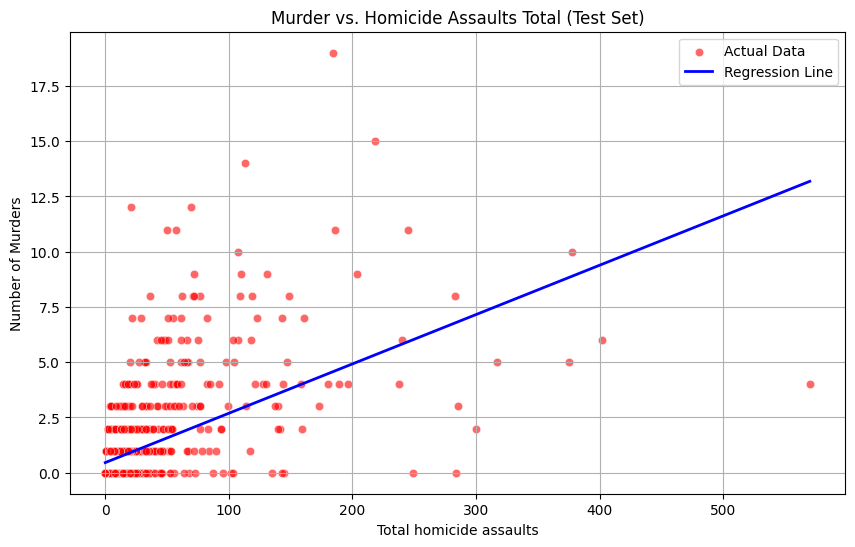


--- Analyzing: Murder vs. Crimes Against Women Total ---
Model Coefficient (slope): 0.1099
Model Intercept: 0.5997
R-squared score: 0.2156


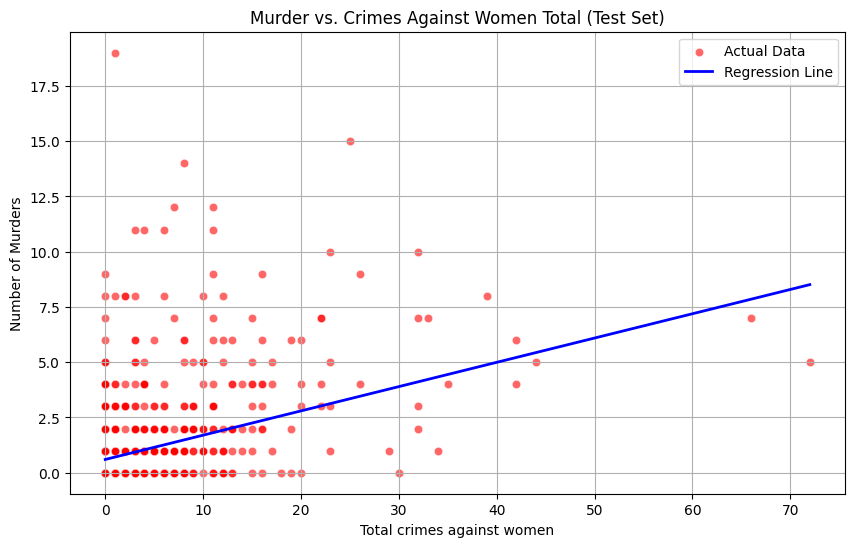


--- Analyzing: Murder vs. Kidnapping Abduction Total ---
Model Coefficient (slope): 0.1658
Model Intercept: 0.7628
R-squared score: 0.0970


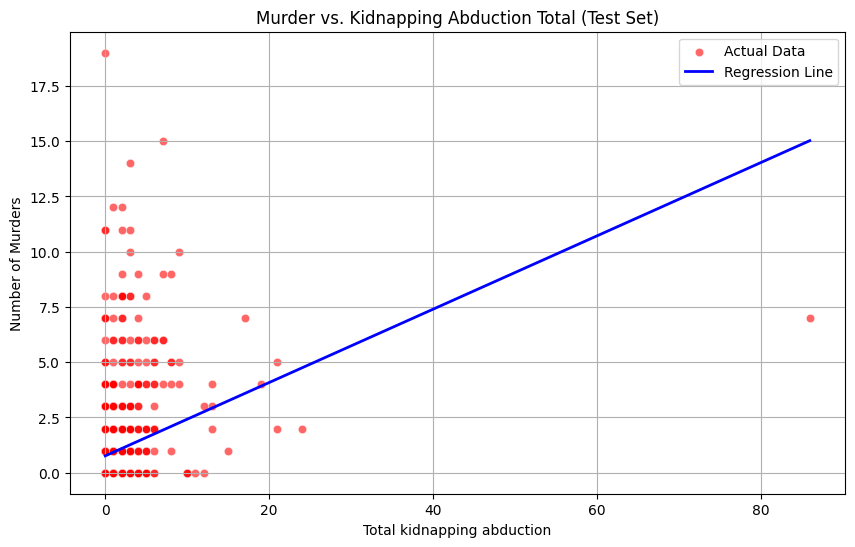


--- Analyzing: Murder vs. Property Theft Robbery Total ---
Model Coefficient (slope): 0.0661
Model Intercept: 0.4591
R-squared score: 0.4016


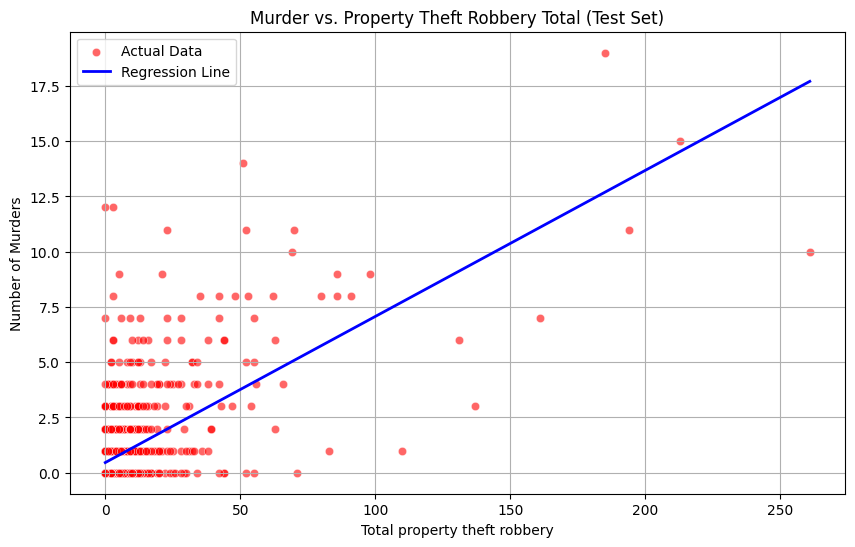


--- Analyzing: Murder vs. Financial Fraud Total ---
Model Coefficient (slope): 0.7689
Model Intercept: 0.8175
R-squared score: 0.0626


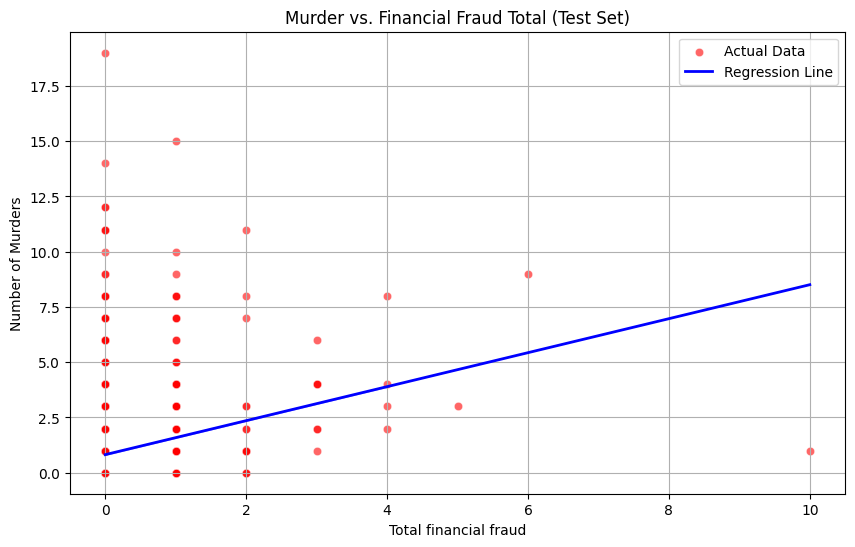


--- Analyzing: Murder vs. Rioting Public Order Total ---
Model Coefficient (slope): 0.1783
Model Intercept: 0.7260
R-squared score: 0.1653


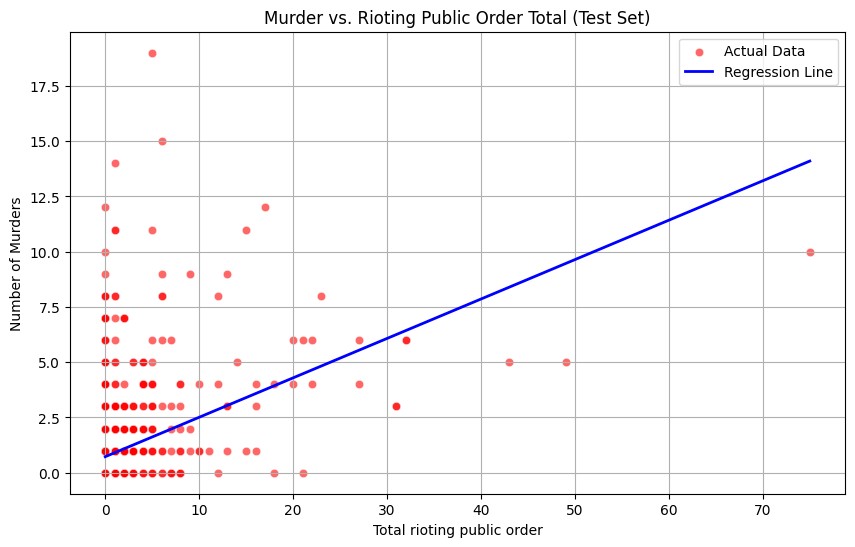


--- Analyzing: Murder vs. Negligence Accidents Total ---
Model Coefficient (slope): 0.1098
Model Intercept: 0.7625
R-squared score: -0.1022


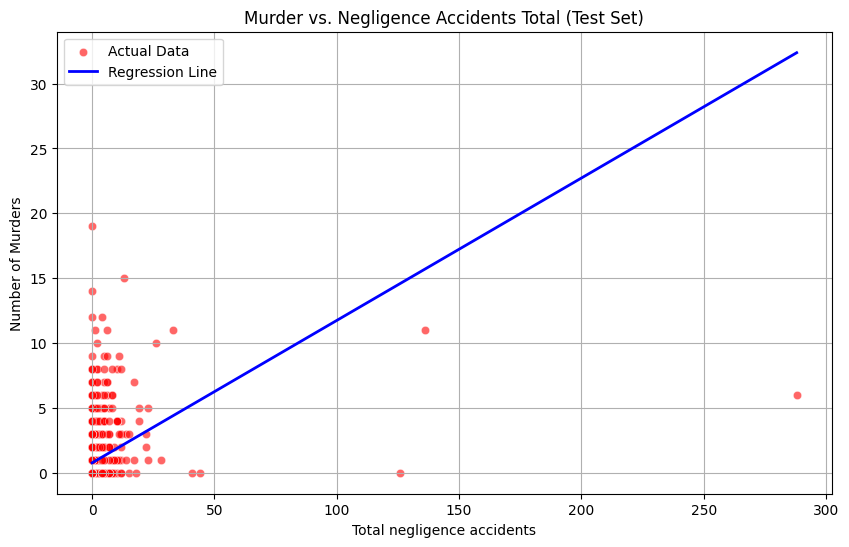


--- Analyzing: Murder vs. Human Trafficking Total ---
Model Coefficient (slope): 1.4466
Model Intercept: 0.9204
R-squared score: -0.0038


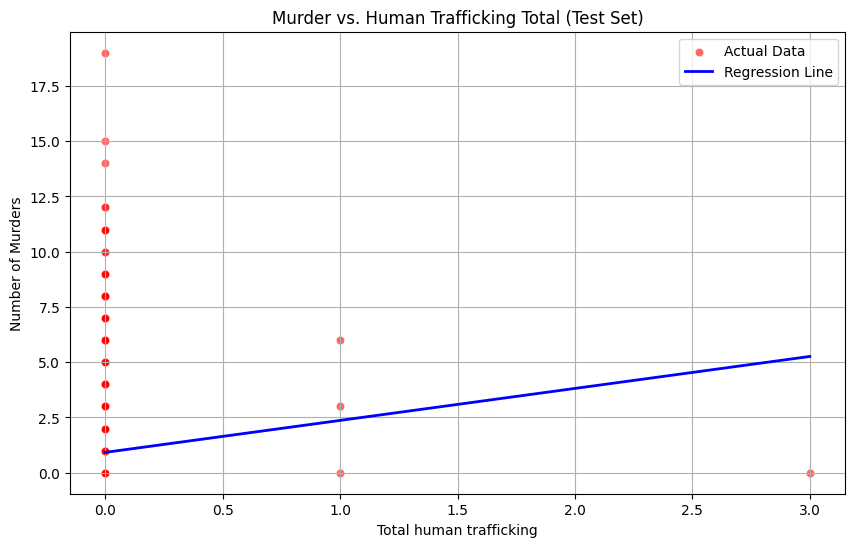


--- Analyzing: Murder vs. Other Ipc Crimes Total ---
Model Coefficient (slope): 0.0268
Model Intercept: 0.6916
R-squared score: 0.1892


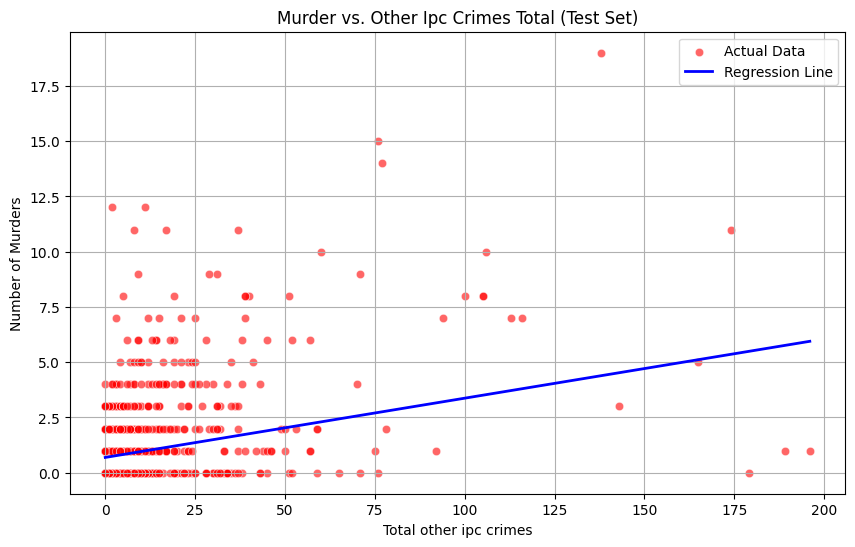

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Load your dataset ---
try:
    # Please ensure the file path is correct for your system
    df = pd.read_csv('/Users/padmanabhjagdishwanikar/Downloads/22070521058_PadmanabhWanikar_SecA_CA1_DSEDA/cleaned_dataset.csv')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: 'cleaned_dataset.csv' not found. Please check the file path.")
    exit()

# --- Step 2: Define Comprehensive Crime Categories for ALL Columns ---
excluded_cols = ['id', 'year', 'state_name', 'district_name', 'registration_circles', 'murder']
all_crime_cols = [col for col in df.columns if col not in excluded_cols and pd.api.types.is_numeric_dtype(df[col])]
categorized_cols = set()

homicide_assaults = [
    'clpbl_hmcd_not_amntng_mrd', 'attempt_to_commit_muder', 'atmpt_cmmt_culpbl_hmcd',
    'volntri_cusng_simp_hrt', 'volntri_cusng_grvus_hrt', 'volntri_cusng_hrt_publ_srvnt',
    'other_simple_hurt', 'grvus_hrt_dang_wepon_or_mean', 'acid_attack', 'atmpt_acid_attack',
    'grvus_hrt_pblc_srvnt', 'grvus_hrt_endngng_lyf_sfty', 'other_grievous_hurt', 'ofnc_affect_humn_body'
]
categorized_cols.update(homicide_assaults)

crimes_against_women = [
    'dowry_death', 'assault_on_women', 'sexual_harassment_at_work', 'sex_hrsmt_publ_trnsprt_sys',
    'sex_hrsmt_shlt_homes_wmn_chld', 'sex_hrsmt_other_places', 'intent_disrobe', 'voyeurism',
    'stalking', 'rape', 'attempt_to_commit_rape', 'cruelty_by_husband_relatives', 'insult_women_modesty'
]
categorized_cols.update(crimes_against_women)

kidnapping_abduction = [
    'missing_children_kidnpd', 'other_kidnpd_abdctn', 'kidnp_purp_begging', 'kidnp_abdctn_murder',
    'kidnapping_foe_ransom', 'kidnp_abdctn_marriage', 'proc_minor_girls', 'other_kidnp_sec_365_369'
]
categorized_cols.update(kidnapping_abduction)

property_theft_robbery = [
    'robbery', 'dacoity', 'mkng_assembly_dacoity', 'auto_motor_vehicle_theft', 'day_time', 'night', 'ext_and_blackmailing'
]
categorized_cols.update(property_theft_robbery)

# CORRECTED: Removed 'atmpt_cheat' from this list as it does not exist
financial_fraud = [
    'criminal_breach_of_trust', 'cheating', 'forgery', 'crdt_card_dbt_card', 'bank', 'other_frauds',
    'counterfeit_coin', 'cntrfeit_currency_bank_notes', 'cntrfeit_govt_stmp', 'cntrfeit_seal_mark'
]
categorized_cols.update(financial_fraud)

rioting_public_order = [
    'rioting_caste_conflict', 'money_dispute_rioting', 'water_dispute_rioting', 'rioting_industrial',
    'enmity_rivalry_rioting', 'rioting_andolan_morcha', 'land_prpty_dispute_riot', 'rioting_agrarian',
    'rioting_vigilants', 'rioting_students', 'rioting_political', 'other_rioting', 'family_dispute_rioting',
    'rioting_communal_religious', 'rioting_sectarian', 'ofnc_agnst_publ_tanquillity', 'affray', 'arson'
]
categorized_cols.update(rioting_public_order)

negligence_accidents = [
    'hit_and_run', 'other_accidents', 'death_due_neglnc_rel_rail_acdnt', 'death_due_to_med_neglnc',
    'death_due_neglnc_civic_body', 'death_due_other_negligence', 'rash_drivng_pub_way',
    'hrt_by_rash_drivng_pub', 'grvus_hrt_by_rash_drivng_pub'
]
categorized_cols.update(negligence_accidents)

human_trafficking = [
    'human_trafficking', 'expl_trficked_persn', 'sell_minors_for_prost', 'buy_minors_for_prost', 'import_girls_frgn_cntry'
]
categorized_cols.update(human_trafficking)

other_ipc_crimes = [col for col in all_crime_cols if col not in categorized_cols]

crime_categories_dict = {
    'homicide_assaults_total': homicide_assaults,
    'crimes_against_women_total': crimes_against_women,
    'kidnapping_abduction_total': kidnapping_abduction,
    'property_theft_robbery_total': property_theft_robbery,
    'financial_fraud_total': financial_fraud,
    'rioting_public_order_total': rioting_public_order,
    'negligence_accidents_total': negligence_accidents,
    'human_trafficking_total': human_trafficking,
    'other_ipc_crimes_total': other_ipc_crimes
}

for cat_name, cols in crime_categories_dict.items():
    if not cols: # Skip empty categories
        continue
    df[cat_name] = df[cols].sum(axis=1)

print("\nCreated comprehensive crime category totals.")

# --- Step 3: Loop Through Categories and Perform Linear Regression ---
y = df['murder'].values
crime_category_totals = list(crime_categories_dict.keys())

for category in crime_category_totals:
    if not crime_categories_dict[category]: # Skip if category is empty
        continue
    print(f"\n--- Analyzing: Murder vs. {category.replace('_', ' ').title()} ---")
    
    X = df[[category]].values
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    print(f"Model Coefficient (slope): {model.coef_[0]:.4f}")
    print(f"Model Intercept: {model.intercept_:.4f}")
    score = model.score(X_test, y_test)
    print(f"R-squared score: {score:.4f}")
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X_test.flatten(), y=y_test, color='red', alpha=0.6, label='Actual Data')
    sns.lineplot(x=X_test.flatten(), y=model.predict(X_test), color='blue', linewidth=2, label='Regression Line')
    
    plt.title(f'Murder vs. {category.replace("_", " ").title()} (Test Set)')
    plt.xlabel(f'Total {category.replace("_total", "").replace("_", " ")}')
    plt.ylabel('Number of Murders')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
# df = pd.read_csv('/Users/padmanabhjagdishwanikar/Downloads/22070521058_PadmanabhWanikar_SecA_CA1_DSEDA/cleaned_dataset.csv')

In [4]:
pip install statsmodels

  Using cached statsmodels-0.14.5-cp311-cp311-macosx_11_0_arm64.whl.metadata (9.5 kB)
  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 5.9 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 25.0 -> 25.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm

# --- Step 1: Load and Prepare the Data ---
try:
    df = pd.read_csv('/Users/padmanabhjagdishwanikar/Downloads/22070521058_PadmanabhWanikar_SecA_CA1_DSEDA/cleaned_dataset.csv')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: 'cleaned_dataset.csv' not found. Please check the file path.")
    exit()

# --- Re-create the Crime Categories ---
violent_crimes = ['clpbl_hmcd_not_amntng_mrd', 'attempt_to_commit_muder', 'atmpt_cmmt_culpbl_hmcd', 'volntri_cusng_grvus_hrt', 'grvus_hrt_dang_wepon_or_mean', 'acid_attack', 'atmpt_acid_attack']
property_crimes = ['robbery', 'dacoity']
crimes_against_women = ['rape', 'dowry_death', 'assault_on_women', 'sexual_harassment_at_work', 'intent_disrobe', 'voyeurism', 'stalking']
negligence_deaths = ['hit_and_run', 'other_accidents', 'death_due_neglnc_rel_rail_acdnt', 'death_due_to_med_neglnc', 'death_due_neglnc_civic_body', 'death_due_other_negligence']

df['violent_crimes_total'] = df[violent_crimes].sum(axis=1)
df['property_crimes_total'] = df[property_crimes].sum(axis=1)
df['crimes_against_women_total'] = df[crimes_against_women].sum(axis=1)
df['negligence_deaths_total'] = df[negligence_deaths].sum(axis=1)

print("\nCrime categories created.")

# --- Step 2: Backward Elimination ---
# Define our dependent variable (y) and our initial set of independent variables (X)
y = df['murder']
X = df[['violent_crimes_total', 'property_crimes_total', 'crimes_against_women_total', 'negligence_deaths_total']]

# Set our significance level (SL). We will remove any variable with a P-value > 0.05
SL = 0.05

# Start the backward elimination process
while True:
    # We need to add a constant (the intercept) to our model
    X_with_const = sm.add_constant(X)
    
    # Fit the Ordinary Least Squares (OLS) model
    model = sm.OLS(y, X_with_const).fit()
    
    # Get the p-values for each variable
    p_values = model.pvalues
    
    # Find the variable with the highest p-value
    max_p_value = p_values.max()
    
    # If the highest p-value is above our significance level, we remove it
    if max_p_value > SL:
        # Get the name of the feature to remove
        feature_to_remove = p_values.idxmax()
        
        # We don't remove the constant
        if feature_to_remove == 'const':
            print("\nAll remaining variables are significant. Stopping.")
            break
            
        # Drop the feature from our set of independent variables
        X = X.drop(columns=[feature_to_remove])
        print(f"\nRemoving '{feature_to_remove}' (P-value: {max_p_value:.4f})...")
        
    # If no p-value is above our significance level, we stop
    else:
        print("\nAll remaining variables are statistically significant. Stopping.")
        break

# --- Step 3: Display the Final Model ---
print("\n--- Final Optimized Model ---")
# Fit the final model one last time
final_model = sm.OLS(y, sm.add_constant(X)).fit()

# Print the detailed summary of our final model
print(final_model.summary())

Dataset loaded successfully!

Crime categories created.

All remaining variables are statistically significant. Stopping.

--- Final Optimized Model ---
                            OLS Regression Results                            
Dep. Variable:                 murder   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     1006.
Date:                Mon, 06 Oct 2025   Prob (F-statistic):               0.00
Time:                        21:59:04   Log-Likelihood:                -9813.8
No. Observations:                5322   AIC:                         1.964e+04
Df Residuals:                    5317   BIC:                         1.967e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                 coef    std err         

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Load and Prepare the Data ---
try:
    df = pd.read_csv('cleaned_dataset.csv')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: 'cleaned_dataset.csv' not found. Please check the file path.")
    exit()

# --- Step 2: Identify and Rank All Predictor Columns ---
y = df['murder']
excluded_cols = ['id', 'year', 'state_name', 'district_name', 'registration_circles', 'murder']
predictor_cols = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col]) and col not in excluded_cols]

results = []
for col in predictor_cols:
    if df[col].nunique() < 2:
        continue
    X = df[[col]].values
    model = LinearRegression()
    model.fit(X, y)
    r_squared = model.score(X, y)
    results.append({'Crime Column': col, 'R-squared': r_squared})

results_df = pd.DataFrame(results)
ranked_df = results_df.sort_values(by='R-squared', ascending=False)

# --- Step 3: Run SLR and Plot for the TOP 10 PREDICTORS ---
# To run for ALL columns, remove ".head(10)" from the line below
top_predictors = ranked_df['Crime Column'].head(10)

print(f"\n--- Now running Simple Linear Regression for the Top {len(top_predictors)} Crime Columns ---")

for col in top_predictors:
    print(f"\n--- Analyzing: Murder vs. {col.replace('_', ' ').title()} ---")
    
    X = df[[col]].values
    
    # Split data for visualization
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create and train the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Print model results
    score = model.score(X_test, y_test)
    print(f"R-squared score: {score:.4f}")
    print(f"Coefficient: {model.coef_[0]:.4f}")
    
    # Visualize the results
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X_test.flatten(), y=y_test, color='red', alpha=0.6, label='Actual Data')
    sns.lineplot(x=X_test.flatten(), y=model.predict(X_test), color='blue', linewidth=2, label='Regression Line')
    
    plt.title(f'Murder vs. {col.replace("_", " ").title()} (Test Set)')
    plt.xlabel(f'Number of cases: {col.replace("_", " ")}')
    plt.ylabel('Number of Murders')
    plt.legend()
    plt.grid(True)
    plt.show()

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm

# --- Step 1: Load and Prepare the Data ---
try:
    df = pd.read_csv('/Users/padmanabhjagdishwanikar/Downloads/22070521058_PadmanabhWanikar_SecA_CA1_DSEDA/cleaned_dataset.csv')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: 'cleaned_dataset.csv' not found. Please check the file path.")
    exit()

# --- Step 2: Define Variables for Backward Elimination ---
# Define our dependent variable (y)
y = df['murder']

# Define our independent variables (X) to be ALL potential crime columns
excluded_cols = [
    'id', 'year', 'state_name', 'district_name', 'registration_circles', 'murder'
]
predictor_cols = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col]) and col not in excluded_cols]
X = df[predictor_cols]

print(f"\nStarting Backward Elimination with {len(predictor_cols)} potential predictors...")

# Set our significance level
SL = 0.05

# --- Step 3: Run the Backward Elimination Process ---
while True:
    X_with_const = sm.add_constant(X)
    model = sm.OLS(y, X_with_const).fit()
    p_values = model.pvalues
    max_p_value = p_values.max()
    
    # If the highest p-value is above our significance level, we remove it
    if max_p_value > SL:
        feature_to_remove = p_values.idxmax()
        # We don't remove the constant
        if feature_to_remove == 'const':
            break
        X = X.drop(columns=[feature_to_remove])
        print(f"Removing '{feature_to_remove}' (P-value: {max_p_value:.4f})...")
    # If no p-value is above our significance level, we stop
    else:
        print("\nAll remaining variables are statistically significant. Stopping.")
        break

# --- Step 4: Display the Final Model ---
print("\n--- Final Optimized Model (using all individual columns) ---")
final_model = sm.OLS(y, sm.add_constant(X)).fit()
print(final_model.summary())

Dataset loaded successfully!

Starting Backward Elimination with 116 potential predictors...
Removing 'sale_obsc_books_objects' (P-value: 0.9868)...
Removing 'atms' (P-value: 0.9832)...
Removing 'elec_pwr_dispute_riot' (P-value: 0.9598)...
Removing 'dacoity_with_murder' (P-value: 0.9215)...
Removing 'buy_minors_for_prost' (P-value: 0.9821)...
Removing 'ofnc_religion' (P-value: 0.7636)...
Removing 'death_due_neglnc_rel_rail_acdnt' (P-value: 0.7538)...
Removing 'other_thefts' (P-value: 0.7266)...
Removing 'riot_on_police_persn_ovt_servt' (P-value: 0.7050)...
Removing 'crdt_card_dbt_card' (P-value: 0.6841)...
Removing 'cntrfeit_govt_stmp' (P-value: 0.9221)...
Removing 'circ_false_fake_news_rumours' (P-value: 0.6785)...
Removing 'obst_on_publ_way' (P-value: 0.6538)...
Removing 'counterfeit_coin' (P-value: 0.9153)...
Removing 'offence_against_state_other' (P-value: 0.6191)...
Removing 'cntrfeit_seal_mark' (P-value: 0.9104)...
Removing 'cheat_by_impersonation' (P-value: 0.6103)...
Removing '

Dataset loaded successfully!


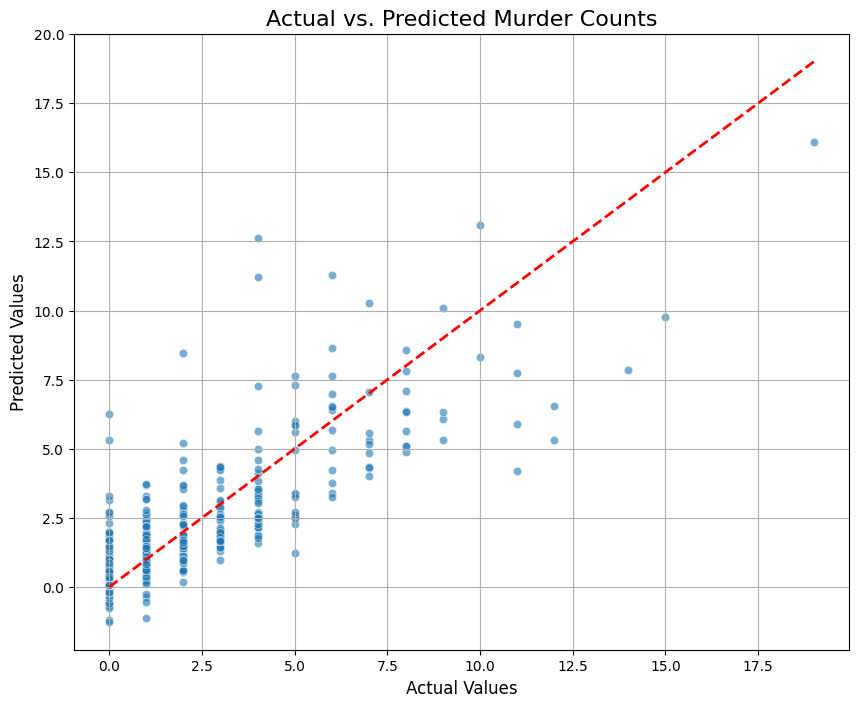

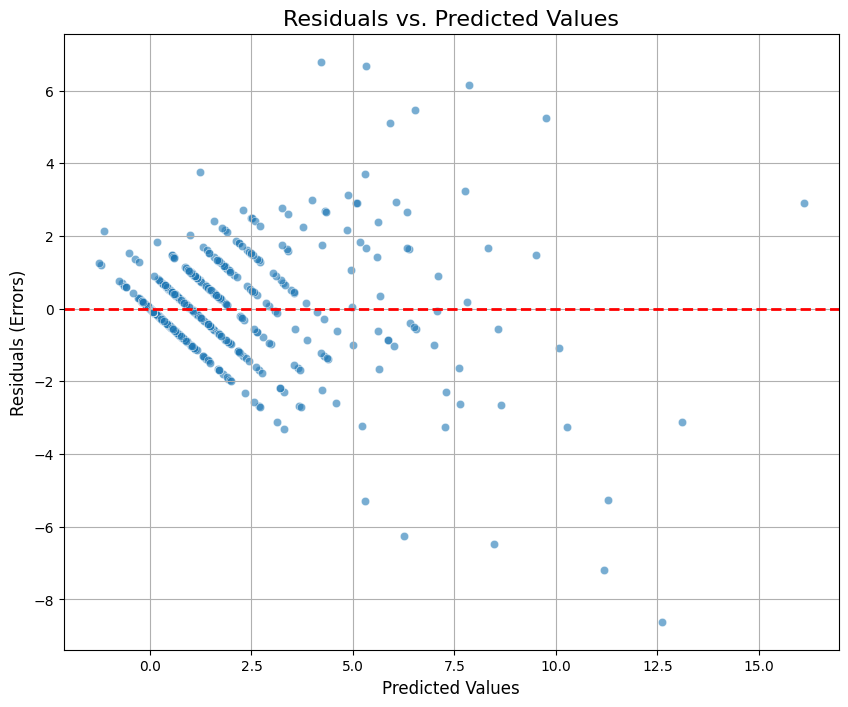

/var/folders/fg/pncsw7c12hjcgdtpdbrk6_sh0000gn/T/ipykernel_82888/3216178993.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_15_coeffs['Coefficient'], y=top_15_coeffs.index, palette='viridis')


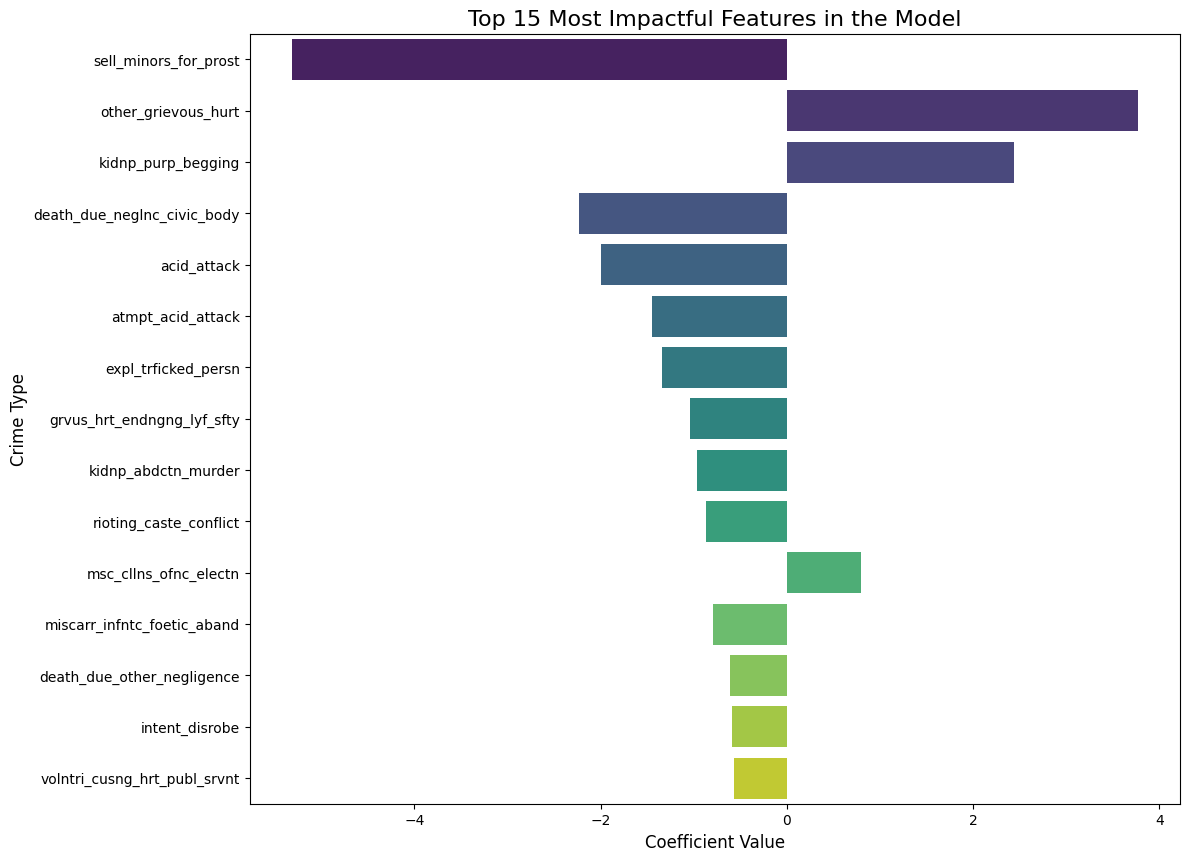

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Load and Prepare the Data ---
try:
    df = pd.read_csv('/Users/padmanabhjagdishwanikar/Downloads/22070521058_PadmanabhWanikar_SecA_CA1_DSEDA/cleaned_dataset.csv')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: 'cleaned_dataset.csv' not found. Please check the file path.")
    exit()

# --- Step 2: Define the final variables from your model output ---
# This list contains the 68 significant predictors that the backward elimination process selected.
final_predictors = [
    'clpbl_hmcd_not_amntng_mrd', 'hit_and_run', 'other_accidents', 'death_due_neglnc_civic_body',
    'death_due_other_negligence', 'dowry_death', 'abetment_of_suicide', 'attempt_to_commit_muder',
    'atmpt_cmmt_culpbl_hmcd', 'atmpt_cmmt_suicide', 'miscarr_infntc_foetic_aband',
    'volntri_cusng_simp_hrt', 'volntri_cusng_grvus_hrt', 'volntri_cusng_hrt_publ_srvnt',
    'hrt_by_endngrng_lyf_sfty_others', 'other_simple_hurt', 'grvus_hrt_dang_wepon_or_mean',
    'acid_attack', 'atmpt_acid_attack', 'grvus_hrt_pblc_srvnt', 'grvus_hrt_endngng_lyf_sfty',
    'other_grievous_hurt', 'wrngl_restraint_cnfnmt', 'assault_on_women',
    'sex_hrsmt_publ_trnsprt_sys', 'sex_hrsmt_other_places', 'intent_disrobe', 'voyeurism',
    'stalking', 'missing_children_kidnpd', 'other_kidnpd_abdctn', 'kidnp_purp_begging',
    'kidnp_abdctn_murder', 'kidnapping_foe_ransom', 'kidnp_abdctn_marriage',
    'proc_minor_girls', 'other_kidnp_sec_365_369', 'human_trafficking',
    'expl_trficked_persn', 'sell_minors_for_prost', 'rape', 'attempt_to_commit_rape',
    'unnatural_offences', 'ofnc_affect_humn_body', 'rioting_caste_conflict',
    'money_dispute_rioting', 'water_dispute_rioting', 'auto_motor_vehicle_theft',

    'day_time', 'night', 'ext_and_blackmailing', 'robbery', 'dacoity',
    'mkng_assembly_dacoity', 'criminal_breach_of_trust', 'cheating', 'forgery',
    'msc_cllns_ofnc_electn', 'rash_drivng_pub_way', 'hrt_by_rash_drivng_pub',

    'grvus_hrt_by_rash_drivng_pub', 'obsc_acts_songs_pub_places', 'ofnc_mischief',
    'criminal_trespass', 'cruelty_by_husband_relatives', 'criminal_intimidation',
    'insult_women_modesty', 'other_ipc_crimes'
]

X = df[final_predictors]
y = df['murder']

# --- Step 3: Train the final model and make predictions ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# --- Step 4: Generate the Diagnostic Plots ---

# 1. Actual vs. Predicted Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', lw=2)
plt.title('Actual vs. Predicted Murder Counts', fontsize=16)
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.grid(True)
plt.show()

# 2. Residuals Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 8))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.title('Residuals vs. Predicted Values', fontsize=16)
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Residuals (Errors)', fontsize=12)
plt.grid(True)
plt.show()

# 3. Feature Importance Plot
# Create a DataFrame for coefficients
coeffs = pd.DataFrame(model.coef_, index=X.columns, columns=['Coefficient'])
# Sort by the absolute value to see the most impactful features
sorted_coeffs = coeffs.reindex(coeffs.Coefficient.abs().sort_values(ascending=False).index)

# Get the top 15 most impactful (positive or negative)
top_15_coeffs = sorted_coeffs.head(15)

plt.figure(figsize=(12, 10))
sns.barplot(x=top_15_coeffs['Coefficient'], y=top_15_coeffs.index, palette='viridis')
plt.title('Top 15 Most Impactful Features in the Model', fontsize=16)
plt.xlabel('Coefficient Value', fontsize=12)
plt.ylabel('Crime Type', fontsize=12)
plt.show()

Dataset loaded successfully!

Data scaled for clustering.


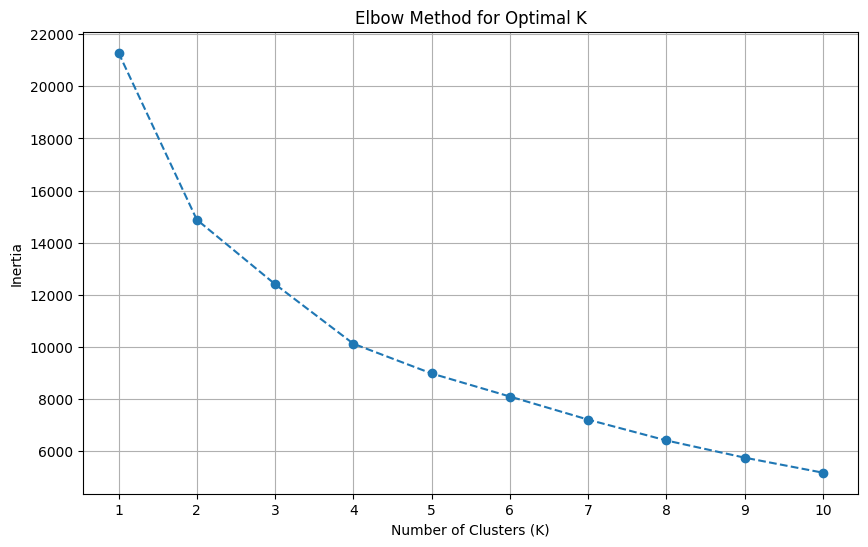


Running K-Means with K=4 clusters...
Clustering complete. Each district has been assigned to a cluster.

Number of districts in each cluster:
cluster
1    4678
0     564
3      64
2      16
Name: count, dtype: int64


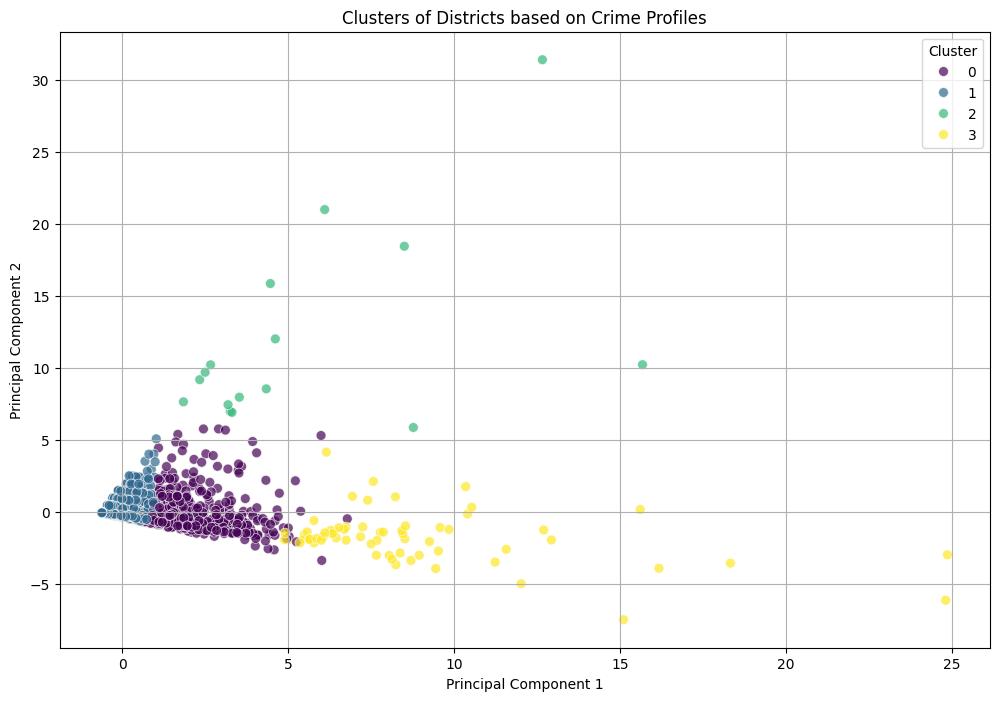


--- Average Crime Profile for Each Cluster ---
         violent_crimes_total  property_crimes_total  \
cluster                                                
0                       17.42                   6.17   
1                        1.34                   0.38   
2                       17.38                   6.69   
3                       68.22                  32.22   

         crimes_against_women_total  negligence_deaths_total  
cluster                                                       
0                             11.50                     1.37  
1                              1.04                     0.21  
2                              6.69                    24.38  
3                             28.64                     2.05  


In [5]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Load and Prepare the Data ---
try:
    df = pd.read_csv('/Users/padmanabhjagdishwanikar/Downloads/22070521058_PadmanabhWanikar_SecA_CA1_DSEDA/cleaned_dataset.csv')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: 'cleaned_dataset.csv' not found. Please check the file path.")
    exit()

# --- Re-create the Crime Categories for Clustering ---
violent_crimes = ['clpbl_hmcd_not_amntng_mrd', 'attempt_to_commit_muder', 'atmpt_cmmt_culpbl_hmcd', 'volntri_cusng_grvus_hrt', 'grvus_hrt_dang_wepon_or_mean', 'acid_attack', 'atmpt_acid_attack']
property_crimes = ['robbery', 'dacoity']
crimes_against_women = ['rape', 'dowry_death', 'assault_on_women', 'sexual_harassment_at_work', 'intent_disrobe', 'voyeurism', 'stalking']
negligence_deaths = ['hit_and_run', 'other_accidents', 'death_due_neglnc_rel_rail_acdnt', 'death_due_to_med_neglnc', 'death_due_neglnc_civic_body', 'death_due_other_negligence']

df['violent_crimes_total'] = df[violent_crimes].sum(axis=1)
df['property_crimes_total'] = df[property_crimes].sum(axis=1)
df['crimes_against_women_total'] = df[crimes_against_women].sum(axis=1)
df['negligence_deaths_total'] = df[negligence_deaths].sum(axis=1)

# --- Select the features for clustering ---
features = ['violent_crimes_total', 'property_crimes_total', 'crimes_against_women_total', 'negligence_deaths_total']
X = df[features]

# --- Step 2: Scale the Data ---
# K-Means is sensitive to the scale of features, so we standardize them
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("\nData scaled for clustering.")

# --- Step 3: Find the Optimal Number of Clusters (Elbow Method) ---
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.xticks(K_range)
plt.grid(True)
plt.show()

# --- Step 4: Run K-Means with the Chosen K ---
# LOOK AT THE PLOT ABOVE: The "elbow" is the point where the line starts to flatten.
# This is often the best number of clusters. Let's try K=4 based on typical results.
optimal_k = 4
print(f"\nRunning K-Means with K={optimal_k} clusters...")

kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)
print("Clustering complete. Each district has been assigned to a cluster.")
print("\nNumber of districts in each cluster:")
print(df['cluster'].value_counts())

# --- Step 5: Analyze and Visualize the Clusters ---
# Use PCA to reduce the 4 features to 2 for plotting
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['pca1'] = X_pca[:, 0]
df['pca2'] = X_pca[:, 1]

# Plot the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=df, palette='viridis', s=50, alpha=0.7)
plt.title('Clusters of Districts based on Crime Profiles')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# --- Step 6: Understand the Cluster Profiles ---
# Calculate the average crime rates for each cluster
cluster_profiles = df.groupby('cluster')[features].mean().round(2)
print("\n--- Average Crime Profile for Each Cluster ---")
print(cluster_profiles)

In [3]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# --- Step 1: Load and Prepare the Data ---
try:
    df = pd.read_csv('/Users/padmanabhjagdishwanikar/Downloads/22070521058_PadmanabhWanikar_SecA_CA1_DSEDA/cleaned_dataset.csv')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: 'cleaned_dataset.csv' not found. Please check the file path.")
    exit()

# --- Step 2: Select all individual crime columns and scale them ---
excluded_cols = ['id', 'year', 'state_name', 'district_name', 'registration_circles', 'murder']
predictor_cols = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col]) and col not in excluded_cols]
X = df[predictor_cols]
X_scaled = StandardScaler().fit_transform(X)

# --- Step 3: Fit PCA and find the components ---
pca = PCA(n_components=2)
pca.fit(X_scaled)

# --- Step 4: Display the crimes that contribute most to PC1 and PC2 ---
# Create a DataFrame to view the "weights" of each crime on the components
pca_components = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=predictor_cols)

print("\n--- What is Principal Component 1? ---")
print("PC1 is mainly a measure of these crimes. A high PC1 score means high numbers in these areas.")
# Sort by the absolute weight to find the most influential crimes
print(pca_components[['PC1']].abs().sort_values(by='PC1', ascending=False).head(5))


print("\n--- What is Principal Component 2? ---")
print("PC2 measures a different set of crimes. A high PC2 score means high numbers in these areas.")
print(pca_components[['PC2']].abs().sort_values(by='PC2', ascending=False).head(5))

Dataset loaded successfully!

--- What is Principal Component 1? ---
PC1 is mainly a measure of these crimes. A high PC1 score means high numbers in these areas.
                               PC1
ofnc_affect_humn_body     0.286615
auto_motor_vehicle_theft  0.241610
volntri_cusng_grvus_hrt   0.238552
attempt_to_commit_muder   0.229896
night                     0.223436

--- What is Principal Component 2? ---
PC2 measures a different set of crimes. A high PC2 score means high numbers in these areas.
                              PC2
assault_on_women         0.286837
other_simple_hurt        0.282182
missing_children_kidnpd  0.249648
rape                     0.239983
dacoity                  0.215429


Dataset loaded successfully!

Using 116 individual crime columns for clustering.
Data scaled for clustering.


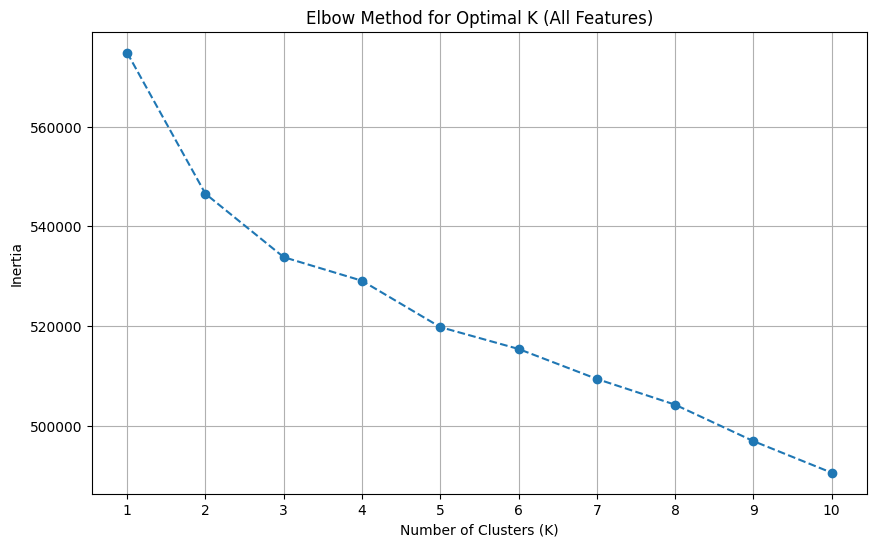


Running K-Means with K=5 clusters...
Detailed clustering complete.


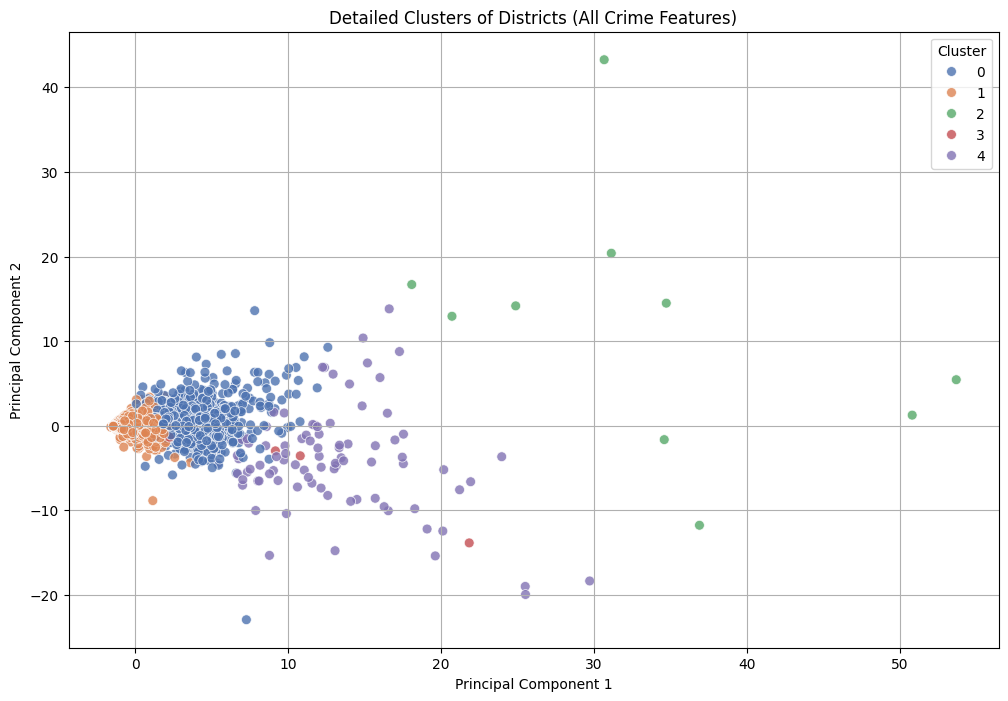


--- Average Profile for Key Crimes in Each Detailed Cluster ---
                  murder  robbery  dacoity   rape  kidnapping_foe_ransom  \
cluster_detailed                                                           
0                   2.96     4.84     0.45   5.71                   0.02   
1                   0.50     0.36     0.07   0.69                   0.00   
2                   9.20    33.30     0.90  33.50                   0.00   
3                   2.40     0.40     0.00   5.60                   0.00   
4                   7.93    17.18     2.79   6.21                   0.18   

                  arson  
cluster_detailed         
0                  0.21  
1                  0.02  
2                  1.00  
3                  0.00  
4                  0.84  


In [7]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Load and Prepare the Data ---
try:
    df = pd.read_csv('/Users/padmanabhjagdishwanikar/Downloads/22070521058_PadmanabhWanikar_SecA_CA1_DSEDA/cleaned_dataset.csv')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: 'cleaned_dataset.csv' not found. Please check the file path.")
    exit()

# --- Step 2: Select all individual crime columns as features ---
excluded_cols = ['id', 'year', 'state_name', 'district_name', 'registration_circles', 'murder']
predictor_cols = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col]) and col not in excluded_cols]
X = df[predictor_cols]

print(f"\nUsing {len(predictor_cols)} individual crime columns for clustering.")

# --- Step 3: Scale the Data ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Data scaled for clustering.")

# --- Step 4: Find the Optimal Number of Clusters (Elbow Method) ---
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K (All Features)')
plt.xticks(K_range)
plt.grid(True)
plt.show()

# --- Step 5: Run K-Means with the Chosen K ---
optimal_k = 5
print(f"\nRunning K-Means with K={optimal_k} clusters...")
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
df['cluster_detailed'] = kmeans.fit_predict(X_scaled)
print("Detailed clustering complete.")

# --- Step 6: Visualize the New Clusters using PCA ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['pca1_detailed'] = X_pca[:, 0]
df['pca2_detailed'] = X_pca[:, 1]

plt.figure(figsize=(12, 8))
sns.scatterplot(x='pca1_detailed', y='pca2_detailed', hue='cluster_detailed', data=df, palette='deep', s=50, alpha=0.8)
plt.title('Detailed Clusters of Districts (All Crime Features)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# --- Step 7: Understand the New Cluster Profiles (Corrected) ---
# CORRECTED: Removed 'theft' from this list
profile_features = ['murder', 'robbery', 'dacoity', 'rape', 'kidnapping_foe_ransom', 'arson']
cluster_profiles = df.groupby('cluster_detailed')[profile_features].mean().round(2)

print("\n--- Average Profile for Key Crimes in Each Detailed Cluster ---")
print(cluster_profiles)

Dataset loaded successfully!

Created target variable 'crime_level'. Districts with more than 12 total crimes are 'High'.

Data split and scaled for classification.
Classification model trained successfully.

Model Accuracy: 88.26%

--- Classification Report ---
              precision    recall  f1-score   support

   Low Crime       0.85      0.93      0.89       541
  High Crime       0.92      0.83      0.87       524

    accuracy                           0.88      1065
   macro avg       0.89      0.88      0.88      1065
weighted avg       0.89      0.88      0.88      1065


--- Confusion Matrix ---


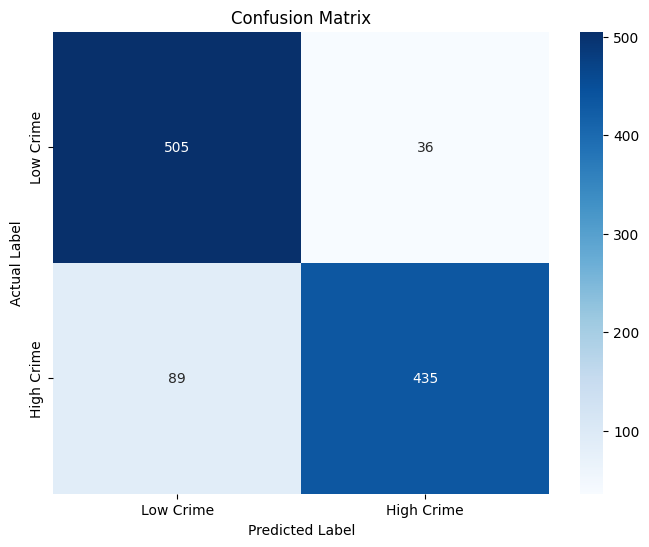

In [11]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Load and Prepare the Data ---
try:
    df = pd.read_csv('/Users/padmanabhjagdishwanikar/Downloads/22070521058_PadmanabhWanikar_SecA_CA1_DSEDA/cleaned_dataset.csv')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: 'cleaned_dataset.csv' not found. Please check the file path.")
    exit()

# --- Step 2: Create the Target Variable (y) ---
# First, get a list of all individual crime columns to calculate a total
excluded_cols = ['id', 'year', 'state_name', 'district_name', 'registration_circles']
crime_cols = [col for col in df.columns if col not in excluded_cols]
df['total_crimes'] = df[crime_cols].sum(axis=1)

# Find the median value of total crimes
crime_median = df['total_crimes'].median()

# Create the binary target variable: 1 for 'High Crime', 0 for 'Low Crime'
df['crime_level'] = (df['total_crimes'] > crime_median).astype(int)
print(f"\nCreated target variable 'crime_level'. Districts with more than {crime_median:.0f} total crimes are 'High'.")

# --- Step 3: Define Features (X) ---
# We'll use our crime categories as features to predict the crime level
# Re-create the categories first
violent_crimes = ['clpbl_hmcd_not_amntng_mrd', 'attempt_to_commit_muder', 'atmpt_cmmt_culpbl_hmcd', 'volntri_cusng_grvus_hrt', 'grvus_hrt_dang_wepon_or_mean', 'acid_attack', 'atmpt_acid_attack']
property_crimes = ['robbery', 'dacoity']
crimes_against_women = ['rape', 'dowry_death', 'assault_on_women', 'sexual_harassment_at_work', 'intent_disrobe', 'voyeurism', 'stalking']
negligence_deaths = ['hit_and_run', 'other_accidents', 'death_due_neglnc_rel_rail_acdnt', 'death_due_to_med_neglnc', 'death_due_neglnc_civic_body', 'death_due_other_negligence']

df['violent_crimes_total'] = df[violent_crimes].sum(axis=1)
df['property_crimes_total'] = df[property_crimes].sum(axis=1)
df['crimes_against_women_total'] = df[crimes_against_women].sum(axis=1)
df['negligence_deaths_total'] = df[negligence_deaths].sum(axis=1)

features = ['violent_crimes_total', 'property_crimes_total', 'crimes_against_women_total', 'negligence_deaths_total']
X = df[features]
y = df['crime_level']

# --- Step 4: Split and Scale the Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("\nData split and scaled for classification.")

# --- Step 5: Train the Logistic Regression Model ---
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)
print("Classification model trained successfully.")

# --- Step 6: Evaluate the Model ---
y_pred = model.predict(X_test_scaled)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2%}")

# Classification Report
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred, target_names=['Low Crime', 'High Crime']))

# Confusion Matrix
print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Crime', 'High Crime'], yticklabels=['Low Crime', 'High Crime'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

Dataset loaded successfully!
Target variable 'crime_level' created. Districts with > 12 crimes are 'High'.
Data has been split and scaled.
Random Forest model trained successfully.

Model Accuracy (Random Forest): 88.64%

--- Classification Report ---
              precision    recall  f1-score   support

   Low Crime       0.86      0.93      0.89       541
  High Crime       0.92      0.85      0.88       524

    accuracy                           0.89      1065
   macro avg       0.89      0.89      0.89      1065
weighted avg       0.89      0.89      0.89      1065


--- Confusion Matrix ---


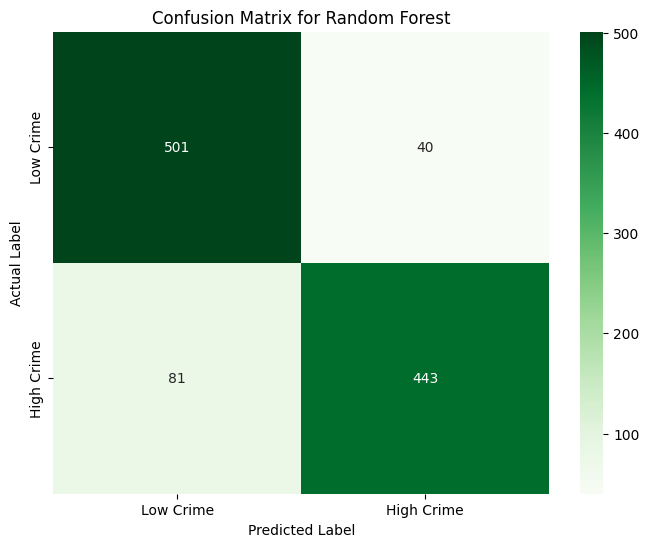

In [13]:

# Import all necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Load and Prepare the Data ---
try:
    df = pd.read_csv('/Users/padmanabhjagdishwanikar/Downloads/22070521058_PadmanabhWanikar_SecA_CA1_DSEDA/cleaned_dataset.csv')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: 'cleaned_dataset.csv' not found. Please check the file path.")
    exit()

# --- Step 2: Create the Target Variable (y) ---
# Calculate total crimes to create a 'High'/'Low' category
excluded_cols = ['id', 'year', 'state_name', 'district_name', 'registration_circles']
crime_cols = [col for col in df.columns if col not in excluded_cols]
df['total_crimes'] = df[crime_cols].sum(axis=1)

# Find the median to split the data into two balanced classes
crime_median = df['total_crimes'].median()

# Create the binary target variable: 1 for 'High Crime', 0 for 'Low Crime'
df['crime_level'] = (df['total_crimes'] > crime_median).astype(int)
print(f"Target variable 'crime_level' created. Districts with > {crime_median:.0f} crimes are 'High'.")

# --- Step 3: Define Features (X) using Crime Categories ---
violent_crimes = ['clpbl_hmcd_not_amntng_mrd', 'attempt_to_commit_muder', 'atmpt_cmmt_culpbl_hmcd', 'volntri_cusng_grvus_hrt', 'grvus_hrt_dang_wepon_or_mean', 'acid_attack', 'atmpt_acid_attack']
property_crimes = ['robbery', 'dacoity']
crimes_against_women = ['rape', 'dowry_death', 'assault_on_women', 'sexual_harassment_at_work', 'intent_disrobe', 'voyeurism', 'stalking']
negligence_deaths = ['hit_and_run', 'other_accidents', 'death_due_neglnc_rel_rail_acdnt', 'death_due_to_med_neglnc', 'death_due_neglnc_civic_body', 'death_due_other_negligence']

df['violent_crimes_total'] = df[violent_crimes].sum(axis=1)
df['property_crimes_total'] = df[property_crimes].sum(axis=1)
df['crimes_against_women_total'] = df[crimes_against_women].sum(axis=1)
df['negligence_deaths_total'] = df[negligence_deaths].sum(axis=1)

features = ['violent_crimes_total', 'property_crimes_total', 'crimes_against_women_total', 'negligence_deaths_total']
X = df[features]
y = df['crime_level']

# --- Step 4: Split and Scale the Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Data has been split and scaled.")

# --- Step 5: Train the Random Forest Model ---
# Initialize the model with 100 trees for a robust prediction
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train_scaled, y_train)
print("Random Forest model trained successfully.")

# --- Step 6: Evaluate the Model's Performance ---
# Make predictions on the unseen test data
y_pred_rf = rf_model.predict(X_test_scaled)

# Calculate and print the accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"\nModel Accuracy (Random Forest): {accuracy_rf:.2%}")

# Print the detailed classification report
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred_rf, target_names=['Low Crime', 'High Crime']))

# Visualize the Confusion Matrix
print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Low Crime', 'High Crime'], yticklabels=['Low Crime', 'High Crime'])
plt.title('Confusion Matrix for Random Forest')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


In [6]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb  # Import XGBoost
from sklearn.metrics import r2_score

# --- Step 1: Load and Prepare the Data ---
try:
    df = pd.read_csv('/Users/padmanabhjagdishwanikar/Downloads/22070521058_PadmanabhWanikar_SecA_CA1_DSEDA/cleaned_dataset.csv')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: 'cleaned_dataset.csv' not found. Please check the file path.")
    exit()

# --- Step 2: Define Features (X) and Target (y) ---
violent_crimes = ['clpbl_hmcd_not_amntng_mrd', 'attempt_to_commit_muder', 'atmpt_cmmt_culpbl_hmcd', 'volntri_cusng_grvus_hrt', 'grvus_hrt_dang_wepon_or_mean', 'acid_attack', 'atmpt_acid_attack']
property_crimes = ['robbery', 'dacoity']
crimes_against_women = ['rape', 'dowry_death', 'assault_on_women', 'sexual_harassment_at_work', 'intent_disrobe', 'voyeurism', 'stalking']
negligence_deaths = ['hit_and_run', 'other_accidents', 'death_due_neglnc_rel_rail_acdnt', 'death_due_to_med_neglnc', 'death_due_neglnc_civic_body', 'death_due_other_negligence']

df['violent_crimes_total'] = df[violent_crimes].sum(axis=1)
df['property_crimes_total'] = df[property_crimes].sum(axis=1)
df['crimes_against_women_total'] = df[crimes_against_women].sum(axis=1)
df['negligence_deaths_total'] = df[negligence_deaths].sum(axis=1)

X = df[['violent_crimes_total', 'property_crimes_total', 'crimes_against_women_total', 'negligence_deaths_total']]
y = df['murder']

# --- Step 3: Split and Scale the Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("\nData split and scaled.")

# --- Step 4: Train the XGBoost Regressor ---
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)
print("XGBoost Regressor model trained.")

# --- Step 5: Evaluate the Model ---
y_pred = model.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
print(f"\nModel R-squared (XGBoost): {r2:.4f}")

Dataset loaded successfully!

Data split and scaled.
XGBoost Regressor model trained.

Model R-squared (XGBoost): 0.3577


In [9]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.metrics import accuracy_score, classification_report

# --- Step 1: Load and Prepare the Data ---
try:
    df = pd.read_csv('/Users/padmanabhjagdishwanikar/Downloads/22070521058_PadmanabhWanikar_SecA_CA1_DSEDA/cleaned_dataset.csv')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: 'cleaned_dataset.csv' not found. Please check the file path.")
    exit()

# --- Step 2: Create Target (y) and Features (X) ---
# Create total_crimes and the target 'crime_level'
excluded_cols = ['id', 'year', 'state_name', 'district_name', 'registration_circles']
crime_cols = [col for col in df.columns if col not in excluded_cols]
df['total_crimes'] = df[crime_cols].sum(axis=1)
crime_median = df['total_crimes'].median()
df['crime_level'] = (df['total_crimes'] > crime_median).astype(int)

# Create feature categories
violent_crimes = ['clpbl_hmcd_not_amntng_mrd', 'attempt_to_commit_muder', 'atmpt_cmmt_culpbl_hmcd', 'volntri_cusng_grvus_hrt', 'grvus_hrt_dang_wepon_or_mean', 'acid_attack', 'atmpt_acid_attack']
property_crimes = ['robbery', 'dacoity']
crimes_against_women = ['rape', 'dowry_death', 'assault_on_women', 'sexual_harassment_at_work', 'intent_disrobe', 'voyeurism', 'stalking']
negligence_deaths = ['hit_and_run', 'other_accidents', 'death_due_neglnc_rel_rail_acdnt', 'death_due_to_med_neglnc', 'death_due_neglnc_civic_body', 'death_due_other_negligence']
df['violent_crimes_total'] = df[violent_crimes].sum(axis=1)
df['property_crimes_total'] = df[property_crimes].sum(axis=1)
df['crimes_against_women_total'] = df[crimes_against_women].sum(axis=1)
df['negligence_deaths_total'] = df[negligence_deaths].sum(axis=1)

X = df[['violent_crimes_total', 'property_crimes_total', 'crimes_against_women_total', 'negligence_deaths_total']]
y = df['crime_level']

# --- Step 3: Split and Scale the Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("\nData split and scaled for SVM.")

# --- Step 4: Train the SVM Classifier ---
model = SVC(kernel='rbf', random_state=42) # 'rbf' kernel is a good default
model.fit(X_train_scaled, y_train)
print("SVM Classifier model trained.")

# --- Step 5: Evaluate the Model ---
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy (SVM): {accuracy:.2%}")
print("\n--- Classification Report (SVM) ---")
print(classification_report(y_test, y_pred, target_names=['Low Crime', 'High Crime']))

Dataset loaded successfully!

Data split and scaled for SVM.
SVM Classifier model trained.

Model Accuracy (SVM): 88.17%

--- Classification Report (SVM) ---
              precision    recall  f1-score   support

   Low Crime       0.86      0.91      0.89       541
  High Crime       0.90      0.85      0.88       524

    accuracy                           0.88      1065
   macro avg       0.88      0.88      0.88      1065
weighted avg       0.88      0.88      0.88      1065



In [11]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# --- Step 1: Load and Prepare the Data ---
try:
    df = pd.read_csv('/Users/padmanabhjagdishwanikar/Downloads/22070521058_PadmanabhWanikar_SecA_CA1_DSEDA/cleaned_dataset.csv')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: 'cleaned_dataset.csv' not found. Please check the file path.")
    exit()

# --- Step 2: Create Target (y) and Features (X) ---
excluded_cols = ['id', 'year', 'state_name', 'district_name', 'registration_circles']
crime_cols = [col for col in df.columns if col not in excluded_cols]
df['total_crimes'] = df[crime_cols].sum(axis=1)
crime_median = df['total_crimes'].median()
df['crime_level'] = (df['total_crimes'] > crime_median).astype(int)

violent_crimes = ['clpbl_hmcd_not_amntng_mrd', 'attempt_to_commit_muder', 'atmpt_cmmt_culpbl_hmcd', 'volntri_cusng_grvus_hrt', 'grvus_hrt_dang_wepon_or_mean', 'acid_attack', 'atmpt_acid_attack']
property_crimes = ['robbery', 'dacoity']
crimes_against_women = ['rape', 'dowry_death', 'assault_on_women', 'sexual_harassment_at_work', 'intent_disrobe', 'voyeurism', 'stalking']
negligence_deaths = ['hit_and_run', 'other_accidents', 'death_due_neglnc_rel_rail_acdnt', 'death_due_to_med_neglnc', 'death_due_neglnc_civic_body', 'death_due_other_negligence']
df['violent_crimes_total'] = df[violent_crimes].sum(axis=1)
df['property_crimes_total'] = df[property_crimes].sum(axis=1)
df['crimes_against_women_total'] = df[crimes_against_women].sum(axis=1)
df['negligence_deaths_total'] = df[negligence_deaths].sum(axis=1)

X = df[['violent_crimes_total', 'property_crimes_total', 'crimes_against_women_total', 'negligence_deaths_total']]
y = df['crime_level']

# --- Step 3: Split and Scale the Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("\nData split and scaled for KNN.")

# --- Step 4: Train the KNN Classifier ---
model = KNeighborsClassifier(n_neighbors=5) # Look at 5 nearest neighbors
model.fit(X_train_scaled, y_train)
print("KNN Classifier model trained.")

# --- Step 5: Evaluate the Model ---
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy (KNN): {accuracy:.2%}")
print("\n--- Classification Report (KNN) ---")
print(classification_report(y_test, y_pred, target_names=['Low Crime', 'High Crime']))

Dataset loaded successfully!

Data split and scaled for KNN.
KNN Classifier model trained.

Model Accuracy (KNN): 87.79%

--- Classification Report (KNN) ---
              precision    recall  f1-score   support

   Low Crime       0.88      0.88      0.88       541
  High Crime       0.88      0.87      0.88       524

    accuracy                           0.88      1065
   macro avg       0.88      0.88      0.88      1065
weighted avg       0.88      0.88      0.88      1065



Dataset loaded successfully!

Data scaled for DBSCAN.

Estimated number of clusters: 13
Estimated number of noise/outlier points: 401

Cluster sizes:
 1     4250
-1      401
 0      385
 2      159
 5       67
 3       14
 8        8
 6        7
 7        7
 9        6
 12       5
 4        5
 11       5
 10       3
Name: count, dtype: int64


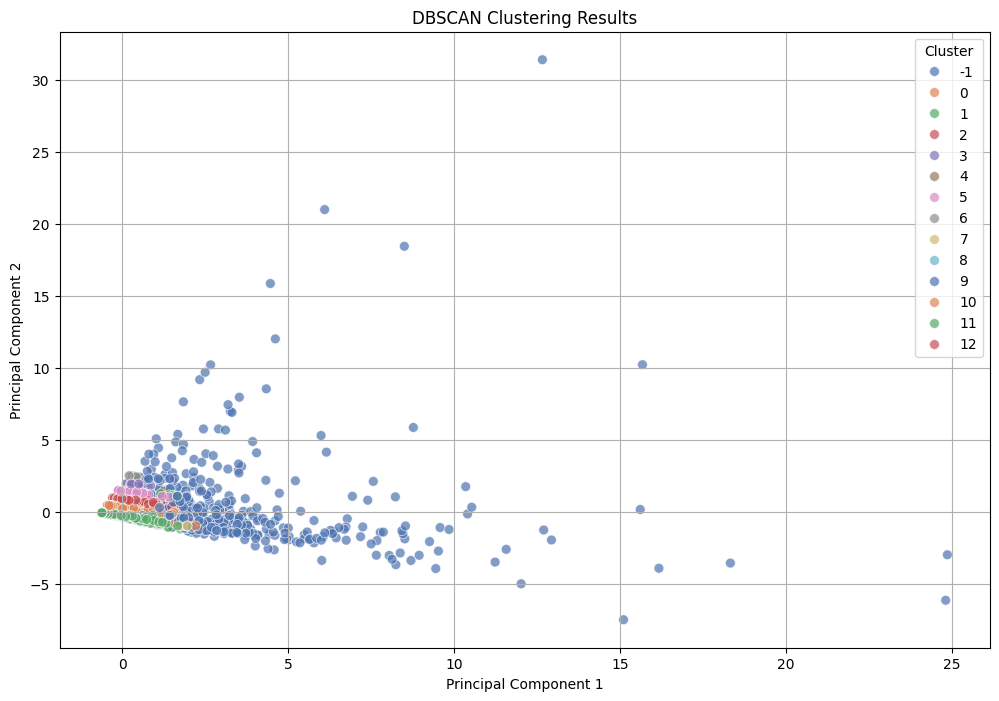

In [12]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# --- Step 1: Load and Prepare the Data ---
try:
    df = pd.read_csv('/Users/padmanabhjagdishwanikar/Downloads/22070521058_PadmanabhWanikar_SecA_CA1_DSEDA/cleaned_dataset.csv')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: 'cleaned_dataset.csv' not found. Please check the file path.")
    exit()

# --- Step 2: Define Features (X) ---
violent_crimes = ['clpbl_hmcd_not_amntng_mrd', 'attempt_to_commit_muder', 'atmpt_cmmt_culpbl_hmcd', 'volntri_cusng_grvus_hrt', 'grvus_hrt_dang_wepon_or_mean', 'acid_attack', 'atmpt_acid_attack']
property_crimes = ['robbery', 'dacoity']
crimes_against_women = ['rape', 'dowry_death', 'assault_on_women', 'sexual_harassment_at_work', 'intent_disrobe', 'voyeurism', 'stalking']
negligence_deaths = ['hit_and_run', 'other_accidents', 'death_due_neglnc_rel_rail_acdnt', 'death_due_to_med_neglnc', 'death_due_neglnc_civic_body', 'death_due_other_negligence']
df['violent_crimes_total'] = df[violent_crimes].sum(axis=1)
df['property_crimes_total'] = df[property_crimes].sum(axis=1)
df['crimes_against_women_total'] = df[crimes_against_women].sum(axis=1)
df['negligence_deaths_total'] = df[negligence_deaths].sum(axis=1)

X = df[['violent_crimes_total', 'property_crimes_total', 'crimes_against_women_total', 'negligence_deaths_total']]

# --- Step 3: Scale the Data ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("\nData scaled for DBSCAN.")

# --- Step 4: Run the DBSCAN Algorithm ---
# 'eps' is the max distance between two samples to be considered neighbors
# 'min_samples' is the number of samples in a neighborhood to be a core point
model = DBSCAN(eps=0.5, min_samples=5)
clusters = model.fit_predict(X_scaled)
df['cluster'] = clusters

# --- Step 5: Analyze the Results ---
n_clusters_ = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise_ = list(clusters).count(-1)
print(f"\nEstimated number of clusters: {n_clusters_}")
print(f"Estimated number of noise/outlier points: {n_noise_}")
print("\nCluster sizes:")
print(pd.Series(clusters).value_counts())

# --- Step 6: Visualize (using PCA) ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['pca1'] = X_pca[:, 0]
df['pca2'] = X_pca[:, 1]

plt.figure(figsize=(12, 8))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=df, palette='deep', s=50, alpha=0.7)
plt.title('DBSCAN Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

Dataset loaded successfully!

Data scaled for Hierarchical Clustering.


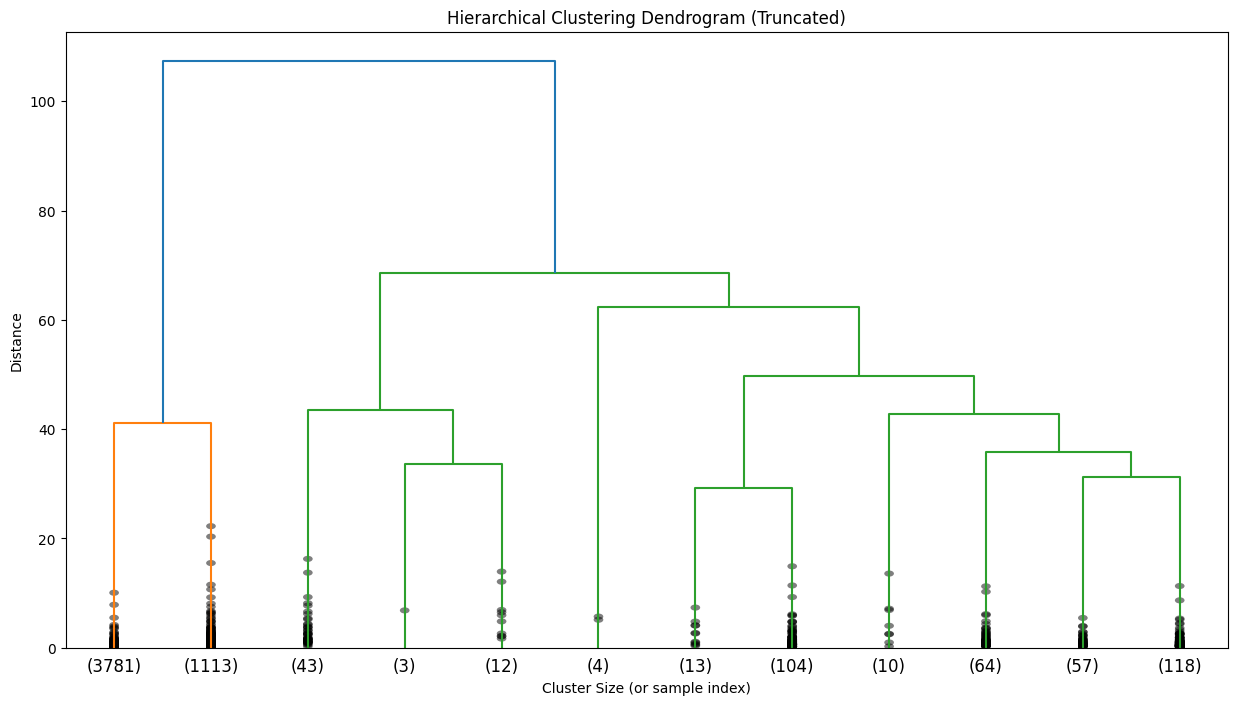

In [13]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage # Import hierarchy functions

# --- Step 1: Load and Prepare the Data ---
try:
    df = pd.read_csv('/Users/padmanabhjagdishwanikar/Downloads/22070521058_PadmanabhWanikar_SecA_CA1_DSEDA/cleaned_dataset.csv')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: 'cleaned_dataset.csv' not found. Please check the file path.")
    exit()

# --- Step 2: Define Features (X) and Scale ---
violent_crimes = ['clpbl_hmcd_not_amntng_mrd', 'attempt_to_commit_muder', 'atmpt_cmmt_culpbl_hmcd', 'volntri_cusng_grvus_hrt', 'grvus_hrt_dang_wepon_or_mean', 'acid_attack', 'atmpt_acid_attack']
property_crimes = ['robbery', 'dacoity']
crimes_against_women = ['rape', 'dowry_death', 'assault_on_women', 'sexual_harassment_at_work', 'intent_disrobe', 'voyeurism', 'stalking']
negligence_deaths = ['hit_and_run', 'other_accidents', 'death_due_neglnc_rel_rail_acdnt', 'death_due_to_med_neglnc', 'death_due_neglnc_civic_body', 'death_due_other_negligence']
df['violent_crimes_total'] = df[violent_crimes].sum(axis=1)
df['property_crimes_total'] = df[property_crimes].sum(axis=1)
df['crimes_against_women_total'] = df[crimes_against_women].sum(axis=1)
df['negligence_deaths_total'] = df[negligence_deaths].sum(axis=1)

X = df[['violent_crimes_total', 'property_crimes_total', 'crimes_against_women_total', 'negligence_deaths_total']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("\nData scaled for Hierarchical Clustering.")

# --- Step 3: Generate the Linkage Matrix ---
# 'ward' linkage is a good default. It tries to minimize the variance within each cluster.
linked = linkage(X_scaled, method='ward')

# --- Step 4: Plot the Dendrogram ---
plt.figure(figsize=(15, 8))
dendrogram(linked,
            orientation='top',
            truncate_mode='lastp',  # Show only the last 'p' merged clusters
            p=12,  # 'p' is the number of clusters to show at the bottom
            show_leaf_counts=True,
            show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram (Truncated)')
plt.xlabel('Cluster Size (or sample index)')
plt.ylabel('Distance')
plt.show()

Dataset loaded successfully!

Data scaled for GMM.

Cluster sizes:
1    3163
0    1399
3     506
2     254
Name: count, dtype: int64


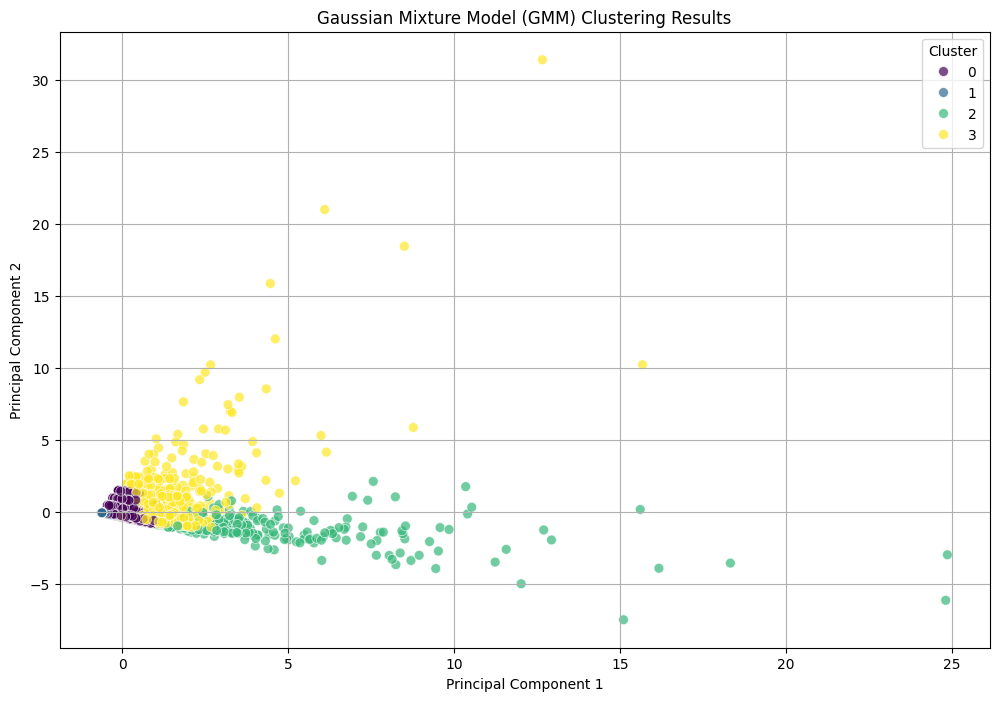

In [14]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

# --- Step 1: Load and Prepare the Data ---
try:
    df = pd.read_csv('/Users/padmanabhjagdishwanikar/Downloads/22070521058_PadmanabhWanikar_SecA_CA1_DSEDA/cleaned_dataset.csv')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: 'cleaned_dataset.csv' not found. Please check the file path.")
    exit()

# --- Step 2: Define Features (X) ---
violent_crimes = ['clpbl_hmcd_not_amntng_mrd', 'attempt_to_commit_muder', 'atmpt_cmmt_culpbl_hmcd', 'volntri_cusng_grvus_hrt', 'grvus_hrt_dang_wepon_or_mean', 'acid_attack', 'atmpt_acid_attack']
property_crimes = ['robbery', 'dacoity']
crimes_against_women = ['rape', 'dowry_death', 'assault_on_women', 'sexual_harassment_at_work', 'intent_disrobe', 'voyeurism', 'stalking']
negligence_deaths = ['hit_and_run', 'other_accidents', 'death_due_neglnc_rel_rail_acdnt', 'death_due_to_med_neglnc', 'death_due_neglnc_civic_body', 'death_due_other_negligence']
df['violent_crimes_total'] = df[violent_crimes].sum(axis=1)
df['property_crimes_total'] = df[property_crimes].sum(axis=1)
df['crimes_against_women_total'] = df[crimes_against_women].sum(axis=1)
df['negligence_deaths_total'] = df[negligence_deaths].sum(axis=1)

X = df[['violent_crimes_total', 'property_crimes_total', 'crimes_against_women_total', 'negligence_deaths_total']]

# --- Step 3: Scale the Data ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("\nData scaled for GMM.")

# --- Step 4: Run the GMM Algorithm ---
# n_components=4 means we are looking for 4 clusters
model = GaussianMixture(n_components=4, random_state=42)
clusters = model.fit_predict(X_scaled)
df['cluster'] = clusters

# --- Step 5: Analyze the Results ---
print("\nCluster sizes:")
print(pd.Series(clusters).value_counts())

# --- Step 6: Visualize (using PCA) ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['pca1'] = X_pca[:, 0]
df['pca2'] = X_pca[:, 1]

plt.figure(figsize=(12, 8))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=df, palette='viridis', s=50, alpha=0.7)
plt.title('Gaussian Mixture Model (GMM) Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# --- Step 1: Load and Prepare the Data ---
try:
    # Use the same file path that has been working for you
    df = pd.read_csv('/Users/padmanabhjagdishwanikar/Downloads/22070521058_PadmanabhWanikar_SecA_CA1_DSEDA/cleaned_dataset.csv')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: 'cleaned_dataset.csv' not found. Please check the file path.")
    exit()

# --- Step 2: Create Target (y) and Features (X) ---
# Create total_crimes and the target 'crime_level'
excluded_cols = ['id', 'year', 'state_name', 'district_name', 'registration_circles']
crime_cols = [col for col in df.columns if col not in excluded_cols]
df['total_crimes'] = df[crime_cols].sum(axis=1)
crime_median = df['total_crimes'].median()
df['crime_level'] = (df['total_crimes'] > crime_median).astype(int)

# Create feature categories
violent_crimes = ['clpbl_hmcd_not_amntng_mrd', 'attempt_to_commit_muder', 'atmpt_cmmt_culpbl_hmcd', 'volntri_cusng_grvus_hrt', 'grvus_hrt_dang_wepon_or_mean', 'acid_attack', 'atmpt_acid_attack']
property_crimes = ['robbery', 'dacoity']
crimes_against_women = ['rape', 'dowry_death', 'assault_on_women', 'sexual_harassment_at_work', 'intent_disrobe', 'voyeurism', 'stalking']
negligence_deaths = ['hit_and_run', 'other_accidents', 'death_due_neglnc_rel_rail_acdnt', 'death_due_to_med_neglnc', 'death_due_neglnc_civic_body', 'death_due_other_negligence']
df['violent_crimes_total'] = df[violent_crimes].sum(axis=1)
df['property_crimes_total'] = df[property_crimes].sum(axis=1)
df['crimes_against_women_total'] = df[crimes_against_women].sum(axis=1)
df['negligence_deaths_total'] = df[negligence_deaths].sum(axis=1)

X = df[['violent_crimes_total', 'property_crimes_total', 'crimes_against_women_total', 'negligence_deaths_total']]
y = df['crime_level']
n_features = X.shape[1] # This will be 4

# --- Step 3: Split and Scale the Data ---
# Scaling is *extremely* important for neural networks
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("\nData split and scaled for Deep Learning.")

# --- Step 4: Build the Neural Network Model ---
model = Sequential()
# Input Layer + First Hidden Layer (32 neurons)
model.add(Dense(32, activation='relu', input_shape=(n_features,)))
# Add Dropout to prevent overfitting (randomly "turns off" 20% of neurons)
model.add(Dropout(0.2))
# Second Hidden Layer (16 neurons)
model.add(Dense(16, activation='relu'))
# Output Layer (1 neuron for binary classification)
# 'sigmoid' activation squashes the output to a probability (0 to 1)
model.add(Dense(1, activation='sigmoid'))

# --- Step 5: Compile the Model ---
# This step builds the model and sets up the training process
model.compile(
    optimizer='adam',                   # 'adam' is a great all-around optimizer
    loss='binary_crossentropy',       # Standard loss function for binary classification
    metrics=['accuracy']                # We want to track accuracy
)
print("\nNeural Network Model Compiled.")
model.summary() # Prints a summary of the model layers

# --- Step 6: Train the Model ---
print("\nStarting model training...")
# 'epochs' are the number of times the model sees the entire dataset
# 'batch_size' is how many samples to process before updating the model
# 'validation_split' uses 20% of training data to check performance
history = model.fit(
    X_train_scaled,
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1 # This will show a progress bar
)
print("Model training complete.")

# --- Step 7: Evaluate the Model ---
print("\nEvaluating model on test data...")
# Get the final loss and accuracy on the unseen test set
loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"\nTest Data Accuracy: {accuracy * 100:.2f}%")

# --- Step 8: View Classification Report ---
# Get probabilities for the test set
y_pred_probs = model.predict(X_test_scaled)
# Convert probabilities to class labels (0 or 1)
y_pred = (y_pred_probs > 0.5).astype(int)

print("\n--- Classification Report (Deep Learning) ---")
print(classification_report(y_test, y_pred, target_names=['Low Crime', 'High Crime']))

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

Dataset loaded successfully!

Data split and scaled for Deep Learning.

Neural Network Model Compiled.


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 705 (2.75 KB)

 Trainable params: 705 (2.75 KB)

 Non-trainable params: 0 (0.00 B)


Starting model training...
Epoch 1/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6498 - loss: 0.6758 - val_accuracy: 0.8533 - val_loss: 0.4496
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8337 - loss: 0.4361 - val_accuracy: 0.8803 - val_loss: 0.3325
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8791 - loss: 0.3340 - val_accuracy: 0.8920 - val_loss: 0.2798
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8801 - loss: 0.3008 - val_accuracy: 0.8967 - val_loss: 0.2663
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 918us/step - accuracy: 0.8892 - loss: 0.2852 - val_accuracy: 0.8979 - val_loss: 0.2609
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8977 - loss: 0.2773 - val_accuracy: 0.8979 - val_loss: 0.2583
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8974 - loss: 0.2738 - val_accuracy: 0.8979 - val_loss: 0.2570
Epoch 8/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8965 - l

In [17]:
pip install pandas scikit-learn numpy altair

  Using cached numpy-1.26.4-cp311-cp311-macosx_11_0_arm64.whl.metadata (114 kB)
Using cached numpy-1.26.4-cp311-cp311-macosx_11_0_arm64.whl (14.0 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.2/731.2 kB 10.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.3
    Uninstalling numpy-2.3.3:
      Successfully uninstalled numpy-2.3.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.3, but you have protobuf 6.32.1 which is incompatible.
tensorflow-decision-forests 1.6.0 requires tensorflow~=2.14.0, but you have tensorflow 2.18.0 which is incompatible.
mediapipe 0.10.9 requires protobuf<4,>=3.11, but you have protobuf 6.32.1 which is incompatible.
spacy 3.7.4 requires typer<0.10.0,>=0.3.0, but you have typer 0.15.1 wh

In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
import altair as alt

# --- 1. Load and Prepare Data ---

# Load the dataset
file_path = '/Users/padmanabhjagdishwanikar/Downloads/22070521058_PadmanabhWanikar_SecA_CA1_DSEDA/cleaned_dataset.csv'
try:
    df = pd.read_csv(file_path)
    print("Data loaded successfully.")
except FileNotFoundError:
    print(f"Error: Make sure '{file_path}' is in the same directory.")
    exit()

# Identify feature columns (all numeric crime statistics)
# We exclude id, year, and the object-type columns
feature_columns = df.select_dtypes(include=[np.number]).columns.drop(['id', 'year'])

# Create a DataFrame for features
features_df = df[feature_columns]

# Handle potential missing values (fill with 0 for crime counts)
features_df = features_df.fillna(0)

# **Crucial Step**: Scale the features
# PCA, t-SNE, and LOF are sensitive to scale, so this is essential.
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_df)

print(f"Data prepared: {features_scaled.shape[0]} rows, {features_scaled.shape[1]} features.")


# --- 2. Apply PCA (Principal Component Analysis) ---
print("\nRunning PCA...")
pca = PCA(n_components=2)
pca_components = pca.fit_transform(features_scaled)

# Create a DataFrame for plotting
pca_df = pd.DataFrame(data=pca_components, columns=['PCA Component 1', 'PCA Component 2'])
# Add back identifiers for the tooltip
pca_df['state_name'] = df['state_name']
pca_df['district_name'] = df['district_name']

# Get explained variance
explained_variance = pca.explained_variance_ratio_
print(f"PCA Component 1 explains {explained_variance[0]*100:.2f}% variance.")
print(f"PCA Component 2 explains {explained_variance[1]*100:.2f}% variance.")

# Create PCA plot with Altair
pca_chart = alt.Chart(pca_df).mark_circle(size=60).encode(
    x=alt.X('PCA Component 1', title='PCA Component 1'),
    y=alt.Y('PCA Component 2', title='PCA Component 2'),
    tooltip=['state_name', 'district_name']
).properties(
    title='PCA of Crime Data (2 Components)',
    width=600,
    height=400
).interactive() # interactive() allows zoom and pan

# Save the chart to a JSON file
pca_chart_path = 'pca_plot.json'
pca_chart.save(pca_chart_path)
print(f"PCA plot saved to {pca_chart_path}")
# Note: In a Jupyter Notebook, you can just type `pca_chart` in a cell to display it.


# --- 3. Apply t-SNE (t-distributed Stochastic Neighbor Embedding) ---
print("\nRunning t-SNE... (This may take a minute)")

# Common practice: Use PCA to reduce to ~50 components first
# This speeds up t-SNE and can reduce noise
if features_scaled.shape[1] > 50:
    pca_50 = PCA(n_components=50)
    features_pca_50 = pca_50.fit_transform(features_scaled)
    tsne_input = features_pca_50
else:
    tsne_input = features_scaled

tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
tsne_components = tsne.fit_transform(tsne_input)

# Create a DataFrame for plotting
tsne_df = pd.DataFrame(data=tsne_components, columns=['t-SNE Component 1', 't-SNE Component 2'])
tsne_df['state_name'] = df['state_name']
tsne_df['district_name'] = df['district_name']

# Create t-SNE plot with Altair
tsne_chart = alt.Chart(tsne_df).mark_circle(size=60).encode(
    x='t-SNE Component 1',
    y='t-SNE Component 2',
    tooltip=['state_name', 'district_name']
).properties(
    title='t-SNE Plot of Crime Data',
    width=600,
    height=400
).interactive()

# Save the chart to a JSON file
tsne_chart_path = 'tsne_plot.json'
tsne_chart.save(tsne_chart_path)
print(f"t-SNE plot saved to {tsne_chart_path}")
# Note: In a Jupyter Notebook, you can just type `tsne_chart` to display it.


# --- 4. Apply Anomaly Detection ---
print("\nRunning Anomaly Detection...")

# Algorithm 1: Isolation Forest
iso_forest = IsolationForest(contamination='auto', random_state=42)
iso_predictions = iso_forest.fit_predict(features_scaled) # -1 for anomaly, 1 for inlier
iso_scores = iso_forest.decision_function(features_scaled) # Lower score = more anomalous

# Algorithm 2: Local Outlier Factor (LOF)
# n_neighbors=20 is a common default.
# 'novelty=True' allows it to be used on new data (and gives access to decision_function)
lof = LocalOutlierFactor(n_neighbors=20, contamination='auto', novelty=True)
lof.fit(features_scaled)
lof_predictions = lof.predict(features_scaled) # -1 for anomaly, 1 for inlier
lof_scores = lof.decision_function(features_scaled) # Lower score = more anomalous

print("Anomaly detection complete.")


# --- 5. Review and Save Anomaly Results ---

# Create a new DataFrame with the results
anomaly_df = df[['id', 'state_name', 'district_name', 'registration_circles']].copy()
anomaly_df['IsolationForest_Score'] = iso_scores
anomaly_df['IsolationForest_Anomaly'] = iso_predictions
anomaly_df['LOF_Score'] = lof_scores
anomaly_df['LOF_Anomaly'] = lof_predictions

# Get the top 10 anomalies from each model
iso_anomalies = anomaly_df.sort_values(by='IsolationForest_Score').head(10)
lof_anomalies = anomaly_df.sort_values(by='LOF_Score').head(10)

print("\n--- Top 10 Anomalies (Isolation Forest) ---")
print(iso_anomalies)

print("\n--- Top 10 Anomalies (LOF) ---")
print(lof_anomalies)

# Save the full anomaly results to a CSV file
anomaly_file_path = 'anomaly_detection_results.csv'
anomaly_df.to_csv(anomaly_file_path, index=False)
print(f"\nFull anomaly results saved to {anomaly_file_path}")

Data loaded successfully.
Data prepared: 5322 rows, 117 features.

Running PCA...
PCA Component 1 explains 8.76% variance.
PCA Component 2 explains 2.37% variance.
PCA plot saved to pca_plot.json

Running t-SNE... (This may take a minute)
t-SNE plot saved to tsne_plot.json

Running Anomaly Detection...
Anomaly detection complete.

--- Top 10 Anomalies (Isolation Forest) ---
        id      state_name district_name    registration_circles  \
5041  5041     Maharashtra        Mumbai  Mumbai Commissionerate   
5026  5026     Maharashtra        Mumbai  Mumbai Commissionerate   
5056  5056     Maharashtra        Mumbai  Mumbai Commissionerate   
1142  1142  Madhya Pradesh        Bhopal                  Bhopal   
5029  5029     Maharashtra          Pune    Pune Commissionerate   
5044  5044     Maharashtra          Pune    Pune Commissionerate   
1938  1938  Madhya Pradesh        Bhopal                  Bhopal   
1375  1375      Tamil Nadu       Chennai                 Chennai   
352    352 